In [271]:
# Import libraries
import math
import matplotlib.pyplot as plt
import sys
import numpy as np
import pandas as pd
import sklearn.linear_model
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sklearn
import quandl
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import warnings
import datetime
import torch, gc, random
from transformers.file_utils import is_tf_available, is_torch_available
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error, mean_absolute_error

warnings.filterwarnings('ignore')

In [272]:
# Read the Dataset from the .csv file
df = pd.read_csv ('DatasetFinalMonthly.csv', index_col='Date')
df

,Oil Price,World Population,GDP East Asia & Pacific,GDP Europe & Central Asia,GDP Latin America & Caribbean,GDP Middle East & North Africa,GDP North America,GDP South Asia,GDP Sub-Saharan Africa,Natural Gas Prices,...,Wind Generations,Hydropower Consumption,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Electricity from oil (TWh),Electricity from gas (TWh),COâ‚‚ emissions,Nuclear (TWh - equivalent),electricity (kWh)
Date,,,,,,,,,,,,,,,,,,,,,
1985-01,25.605161,4861730613,255.312736,1194.511548,497.095898,389.407019,2888.750792,41.634706,110.821454,2.64,...,0.189898,1979.7820,6283.4756,1488.9216,2058.9294,1108.8606,1426.304,5.568627e+07,4224.8374,2032.8466
1985-02,27.192143,4861730613,230.605051,1078.913656,448.989844,351.722469,2609.194264,37.605541,100.096797,2.71,...,0.189898,1979.7820,6283.4756,1488.9216,2058.9294,1108.8606,1426.304,5.568627e+07,4224.8374,2032.8466
1985-03,28.070000,4861730613,255.312736,1194.511548,497.095898,389.407019,2888.750792,41.634706,110.821454,2.62,...,0.189898,1979.7820,6283.4756,1488.9216,2058.9294,1108.8606,1426.304,5.568627e+07,4224.8374,2032.8466
1985-04,28.715333,4861730613,247.076841,1155.978917,481.060547,376.845503,2795.565283,40.291651,107.246569,2.64,...,0.189898,1979.7820,6283.4756,1488.9216,2058.9294,1108.8606,1426.304,5.568627e+07,4224.8374,2032.8466
1985-05,27.570645,4861730613,255.312736,1194.511548,497.095898,389.407019,2888.750792,41.634706,110.821454,2.53,...,0.189898,1979.7820,6283.4756,1488.9216,2058.9294,1108.8606,1426.304,5.568627e+07,4224.8374,2032.8466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08,91.418065,7975105156,1119.052321,1943.294419,677.711664,586.068495,4960.322806,156.742848,134.182657,69.98,...,5551.507400,4201.6652,18220.9300,2842.7300,8246.2800,809.6700,6484.150,1.068044e+08,7273.3768,3676.8247
2022-09,84.173333,7975105156,1082.953859,1880.607502,655.849997,567.163059,4800.312393,151.686627,129.854185,55.18,...,5551.507400,4201.6652,18220.9300,2842.7300,8246.2800,809.6700,6484.150,1.068044e+08,7273.3768,3676.8247
2022-10,86.742903,7975105156,1119.052321,1943.294419,677.711664,586.068495,4960.322806,156.742848,134.182657,20.81,...,5551.507400,4201.6652,18220.9300,2842.7300,8246.2800,809.6700,6484.150,1.068044e+08,7273.3768,3676.8247


In [273]:
df.columns

Index(['Oil Price', 'World Population', 'GDP East Asia & Pacific',
       'GDP Europe & Central Asia', 'GDP Latin America & Caribbean',
       'GDP Middle East & North Africa', 'GDP North America', 'GDP South Asia',
       'GDP Sub-Saharan Africa', 'Natural Gas Prices', 'Average USD/EUR',
       'Average USD/CNY', 'Average USD/GBP', 'Average USD/JPY',
       'US Rig in Operations', 'Recessions (0,1)',
       ' Industrial Production CAN', 'FIndustrial Production  RA',
       'Industrial Production  DEU', 'Industrial Production  JPN',
       'Industrial Production  MEX', 'Industrial Production  TUR',
       'Industrial Production  GBR', 'Industrial Production  USA',
       'Industrial Production  BRA', 'Industrial Production  IND',
       'Oil Productions', 'Oil Consumption', 'Oil Reserves', 'Gas Consumption',
       'Coal Consumption (kWh)', 'Solar Consumption', 'Wind Generations',
       'Hydropower Consumption', 'Electricity from fossil fuels (TWh)',
       'Electricity from nuclear (

In [274]:
df.shape, df.drop_duplicates().shape

((456, 42), (456, 42))

In [275]:
df.dtypes

Oil Price                              float64
World Population                         int64
GDP East Asia & Pacific                float64
GDP Europe & Central Asia              float64
GDP Latin America & Caribbean          float64
GDP Middle East & North Africa         float64
GDP North America                      float64
GDP South Asia                         float64
GDP Sub-Saharan Africa                 float64
Natural Gas Prices                     float64
Average USD/EUR                        float64
Average USD/CNY                        float64
Average USD/GBP                        float64
Average USD/JPY                        float64
US Rig in Operations                     int64
Recessions (0,1)                         int64
 Industrial Production CAN             float64
FIndustrial Production  RA             float64
Industrial Production  DEU             float64
Industrial Production  JPN             float64
Industrial Production  MEX             float64
Industrial Pr

In [276]:
df.isna().sum().sort_values(ascending=False)

Oil Price                              0
Solar Consumption                      0
Industrial Production  USA             0
Industrial Production  BRA             0
Industrial Production  IND             0
Oil Productions                        0
Oil Consumption                        0
Oil Reserves                           0
Gas Consumption                        0
Coal Consumption (kWh)                 0
Wind Generations                       0
World Population                       0
Hydropower Consumption                 0
Electricity from fossil fuels (TWh)    0
Electricity from nuclear (TWh)         0
Electricity from renewables (TWh)      0
Electricity from oil (TWh)             0
Electricity from gas (TWh)             0
COâ‚‚ emissions                        0
Nuclear (TWh - equivalent)             0
Industrial Production  GBR             0
Industrial Production  TUR             0
Industrial Production  MEX             0
Industrial Production  JPN             0
GDP East Asia & 

In [277]:
df.describe()

,Oil Price,World Population,GDP East Asia & Pacific,GDP Europe & Central Asia,GDP Latin America & Caribbean,GDP Middle East & North Africa,GDP North America,GDP South Asia,GDP Sub-Saharan Africa,Natural Gas Prices,...,Wind Generations,Hydropower Consumption,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Electricity from oil (TWh),Electricity from gas (TWh),COâ‚‚ emissions,Nuclear (TWh - equivalent),electricity (kWh)
count,456.000000,4.560000e+02,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,...,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,4.560000e+02,456.000000,456.000000
mean,45.599530,6.445082e+09,550.928144,1614.014463,599.761733,498.222372,3975.721715,86.095389,117.829232,6.151184,...,1065.141598,3012.027545,11589.991947,2404.303545,3869.793521,1100.066674,3596.476637,7.910929e+07,6651.896426,2711.157947
std,29.268482,9.257823e+08,240.268516,266.290480,87.676627,89.482974,651.289718,37.582004,15.362198,6.934672,...,1523.154370,764.794405,3647.613345,327.968291,1779.886404,179.012777,1672.808169,1.601028e+07,847.463754,462.521955
min,11.237097,4.861731e+09,230.605051,1078.913656,445.224497,332.607090,2609.194264,37.605541,89.683998,1.460000,...,0.189898,1979.782000,6283.475600,1488.921600,2058.929400,710.630000,1426.304000,5.568627e+07,4224.837400,2032.846600
25%,20.069000,5.660728e+09,352.869825,1346.161565,514.156556,421.623721,3304.229088,53.133015,104.081470,2.450000,...,21.062428,2356.195800,8117.606000,2225.844200,2504.559600,1008.650000,1925.131200,6.368440e+07,6315.866000,2283.061800
50%,33.203935,6.434825e+09,469.240977,1642.920751,573.185571,483.613188,4086.004580,73.127608,111.253499,3.600000,...,215.140180,2731.560050,11045.685000,2515.691300,3008.315000,1136.850000,3319.245000,7.710725e+07,6809.317750,2592.509250
75%,65.346333,7.250593e+09,730.101326,1857.950198,678.668304,584.961731,4487.497495,114.273147,134.182657,8.140000,...,1732.017000,3788.332300,15363.930000,2634.150000,5018.150000,1254.357300,5085.740000,9.661393e+07,7323.340000,3144.591000
max,134.604667,7.975105e+09,1119.052321,2063.370484,736.520221,634.104643,5030.414191,158.755461,143.392179,69.980000,...,5551.507400,4345.990000,18220.930000,2842.730000,8246.280000,1364.747000,6484.150000,1.068044e+08,7654.419400,3676.824700


In [278]:
#Save the columns name in a variable
df_col = df.columns

Missing values of Oil Price: 0


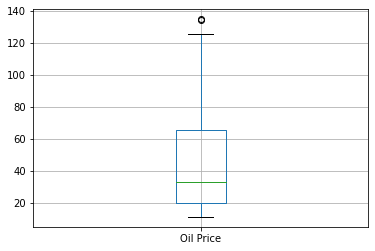

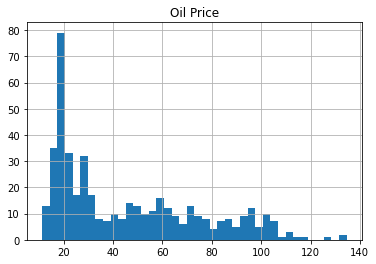

Missing values of World Population: 0


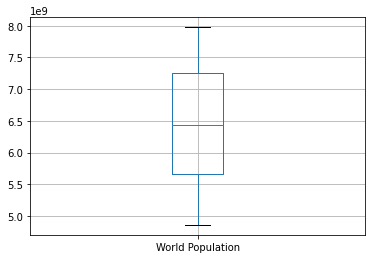

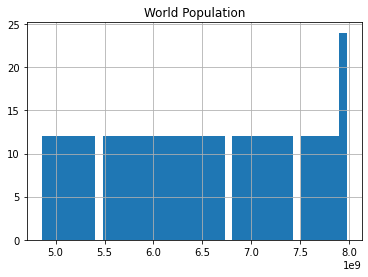

Missing values of GDP East Asia & Pacific: 0


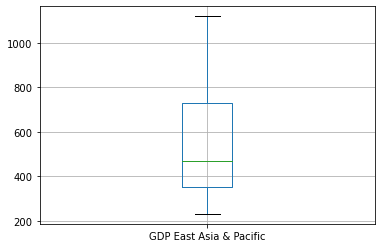

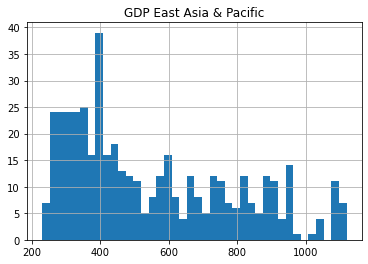

Missing values of GDP Europe & Central Asia: 0


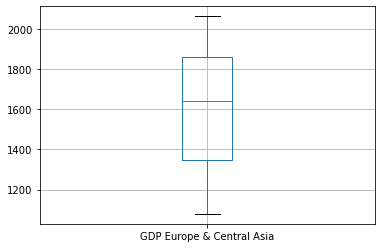

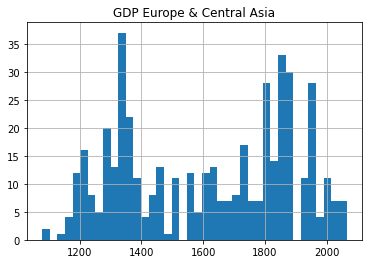

Missing values of GDP Latin America & Caribbean: 0


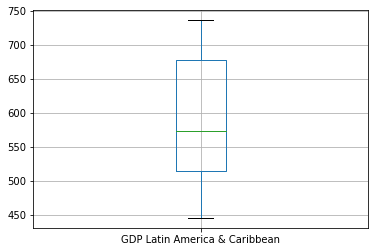

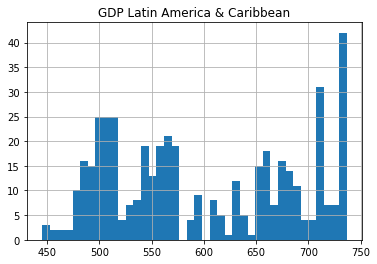

Missing values of GDP Middle East & North Africa: 0


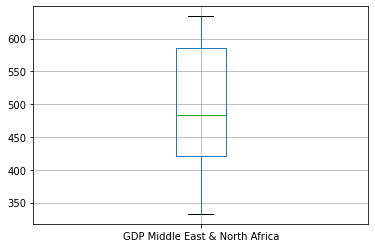

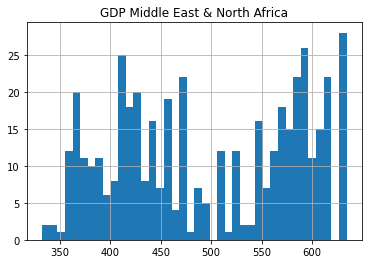

Missing values of GDP North America: 0


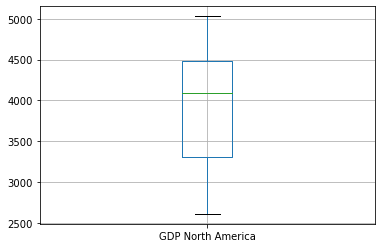

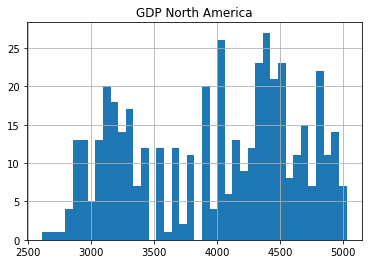

Missing values of GDP South Asia: 0


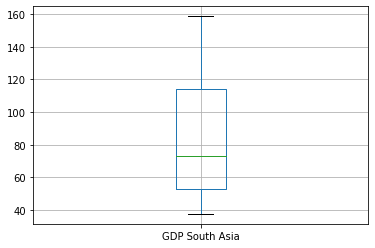

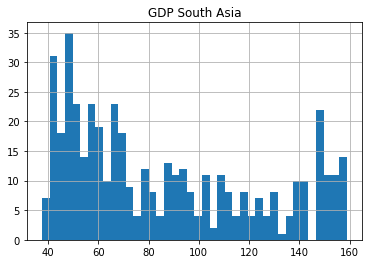

Missing values of GDP Sub-Saharan Africa: 0


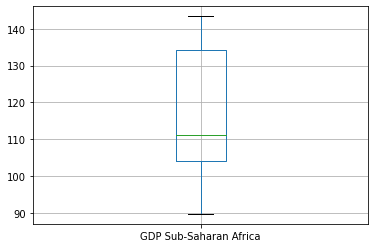

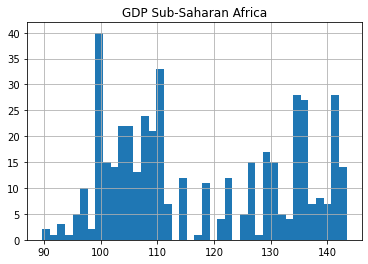

Missing values of Natural Gas Prices: 0


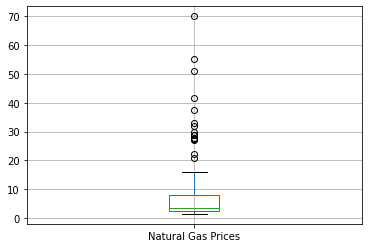

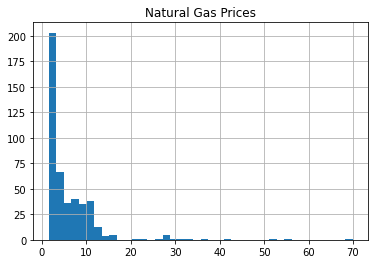

Missing values of Average USD/EUR: 0


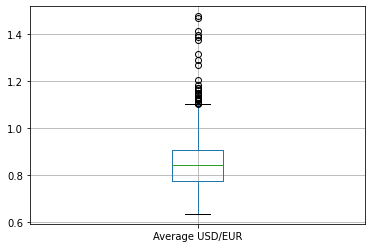

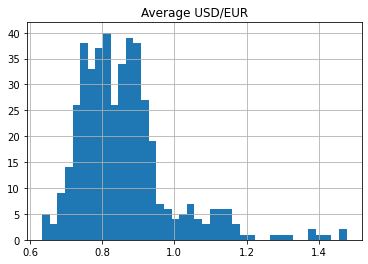

Missing values of Average USD/CNY: 0


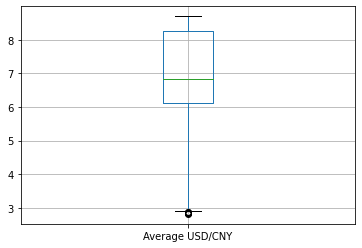

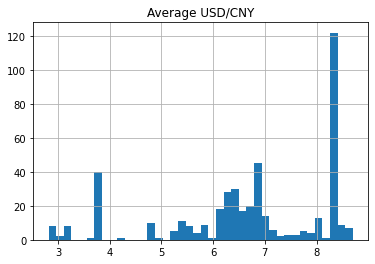

Missing values of Average USD/GBP: 0


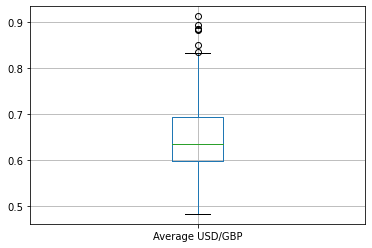

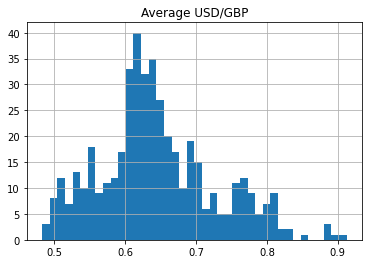

Missing values of Average USD/JPY: 0


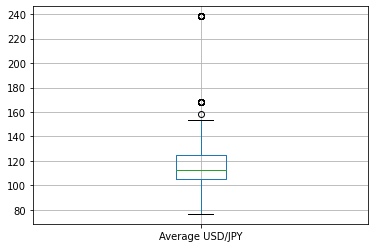

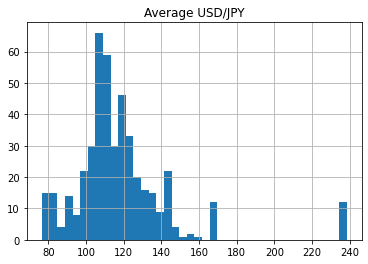

Missing values of US Rig in Operations: 0


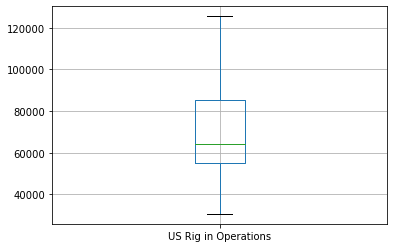

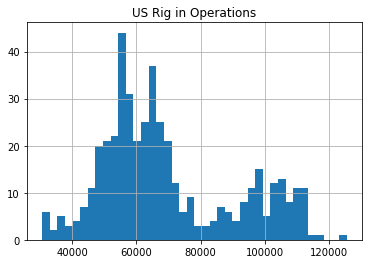

Missing values of Recessions (0,1): 0


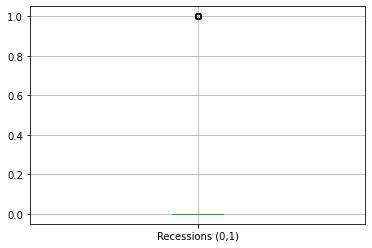

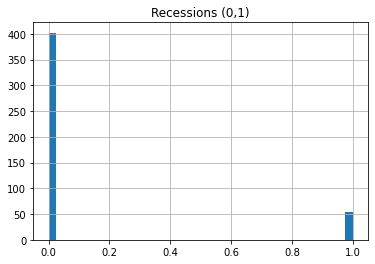

Missing values of  Industrial Production CAN: 0


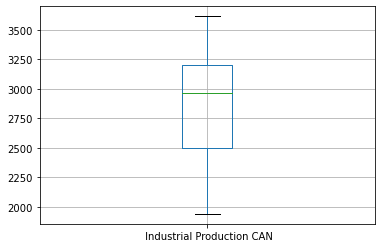

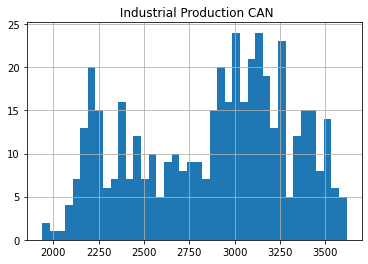

Missing values of FIndustrial Production  RA: 0


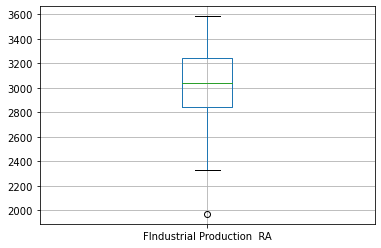

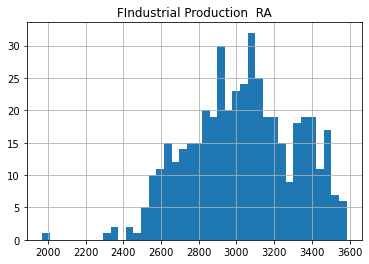

Missing values of Industrial Production  DEU: 0


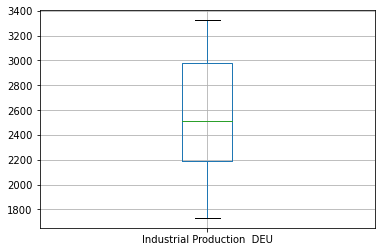

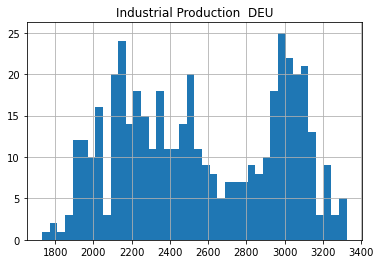

Missing values of Industrial Production  JPN: 0


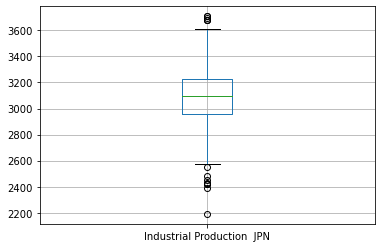

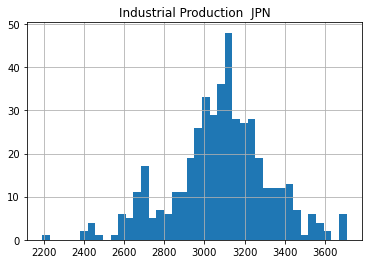

Missing values of Industrial Production  MEX: 0


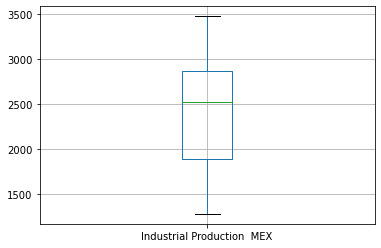

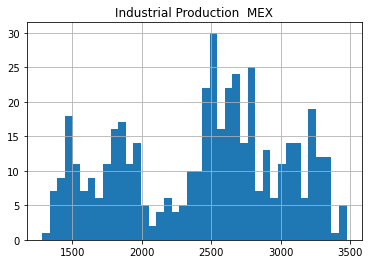

Missing values of Industrial Production  TUR: 0


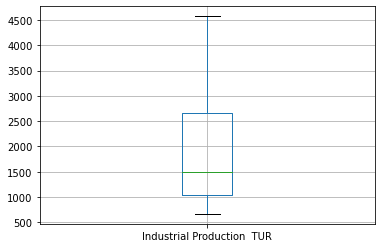

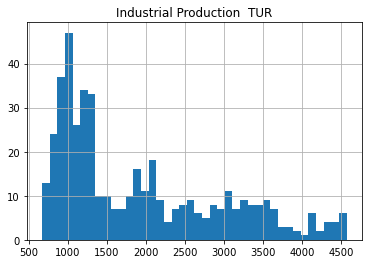

Missing values of Industrial Production  GBR: 0


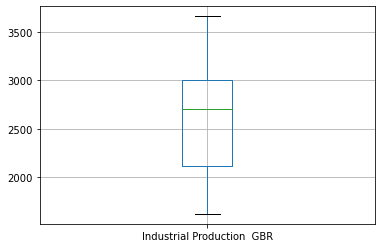

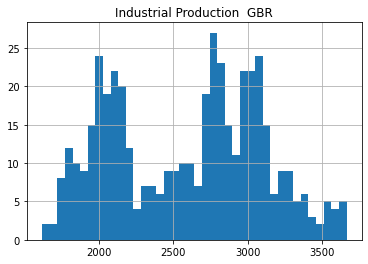

Missing values of Industrial Production  USA: 0


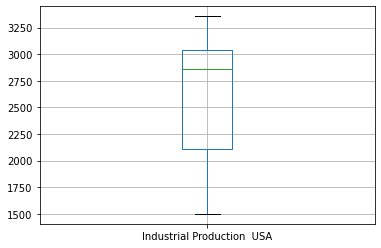

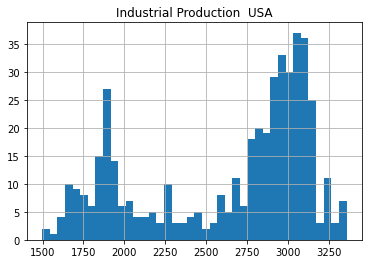

Missing values of Industrial Production  BRA: 0


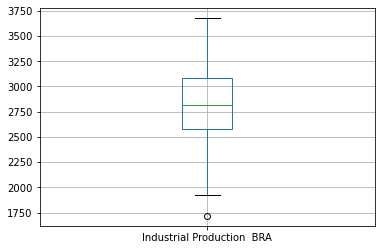

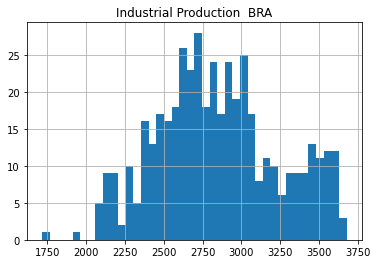

Missing values of Industrial Production  IND: 0


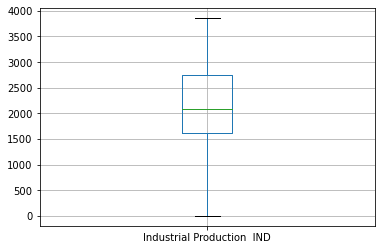

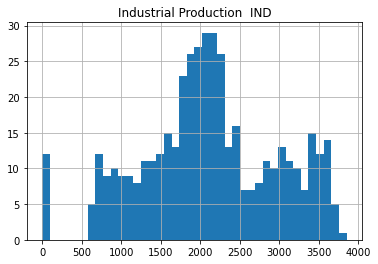

Missing values of Oil Productions: 0


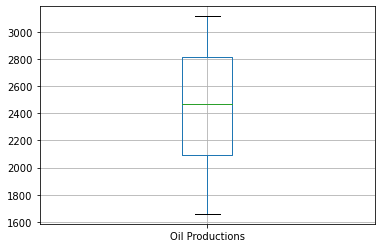

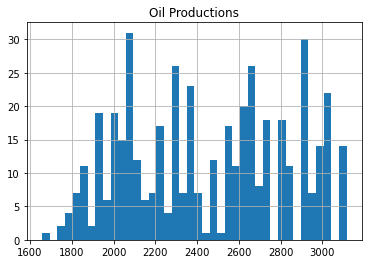

Missing values of Oil Consumption: 0


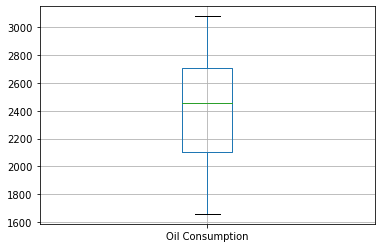

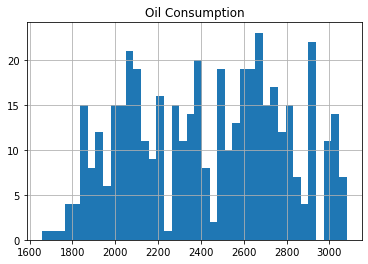

Missing values of Oil Reserves: 0


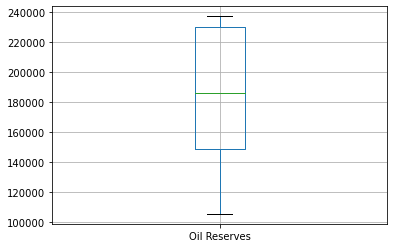

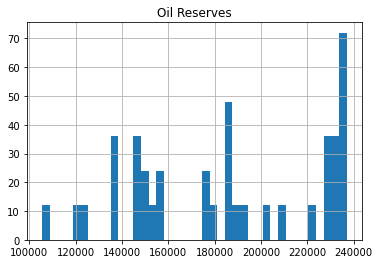

Missing values of Gas Consumption: 0


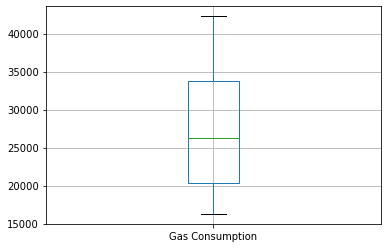

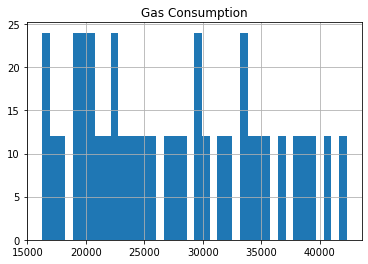

Missing values of Coal Consumption (kWh): 0


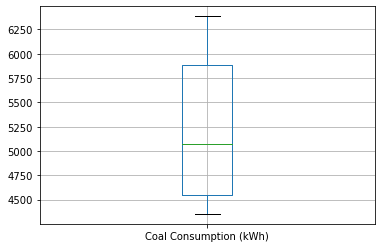

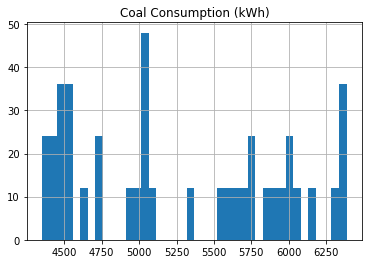

Missing values of Solar Consumption: 0


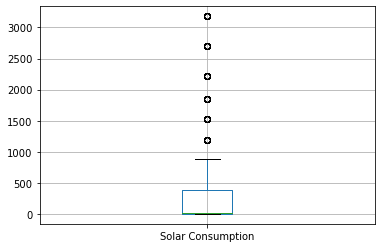

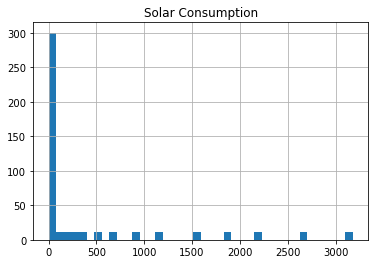

Missing values of Wind Generations: 0


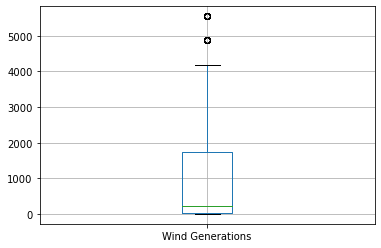

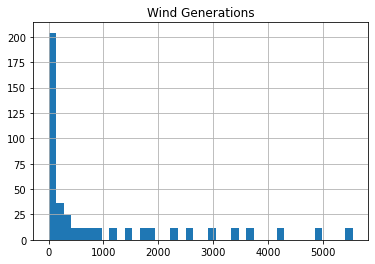

Missing values of Hydropower Consumption: 0


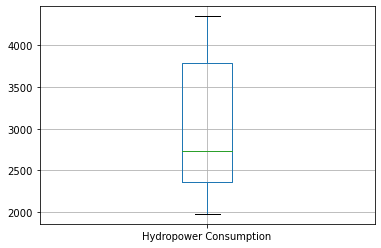

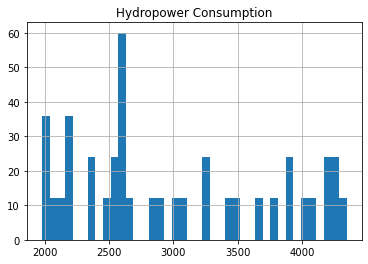

Missing values of Electricity from fossil fuels (TWh): 0


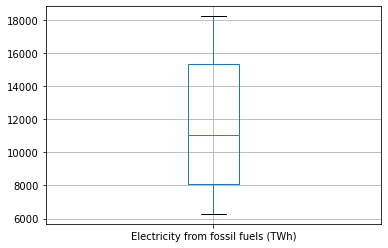

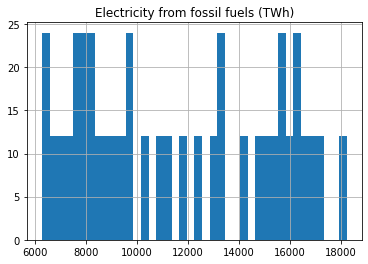

Missing values of Electricity from nuclear (TWh): 0


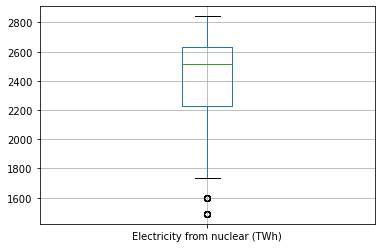

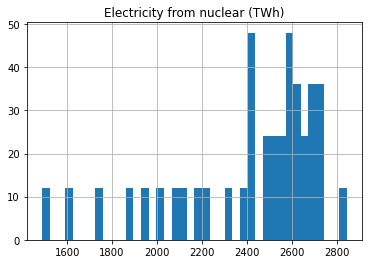

Missing values of Electricity from renewables (TWh): 0


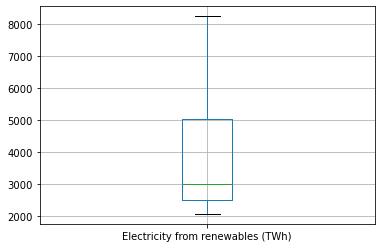

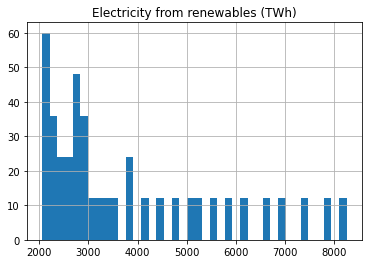

Missing values of Electricity from oil (TWh): 0


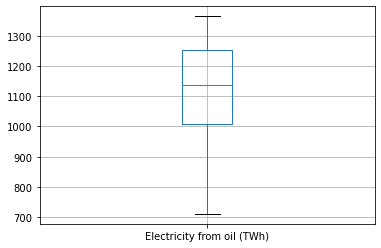

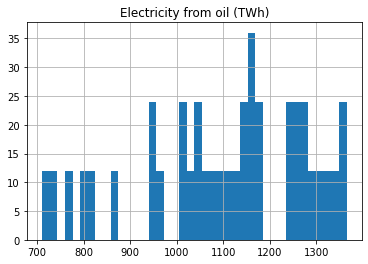

Missing values of Electricity from gas (TWh): 0


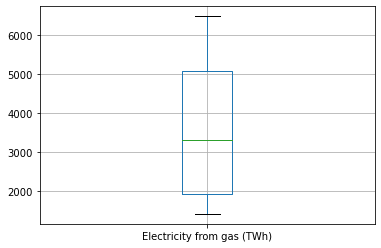

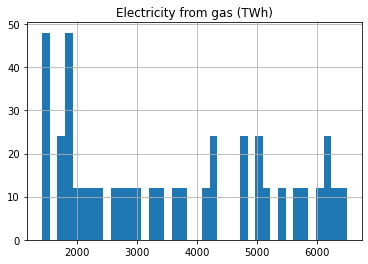

Missing values of COâ‚‚ emissions: 0


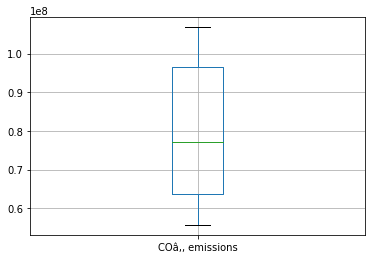

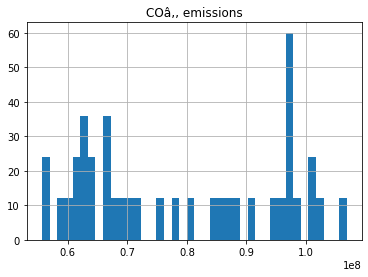

Missing values of Nuclear (TWh - equivalent): 0


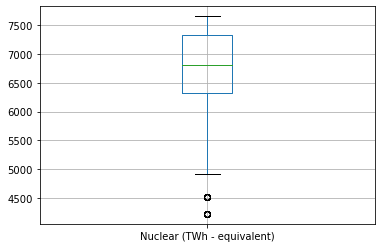

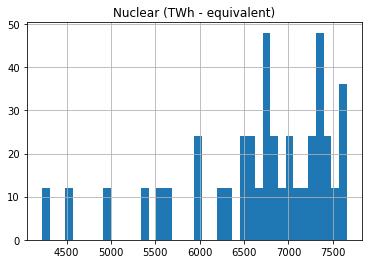

Missing values of  electricity (kWh): 0


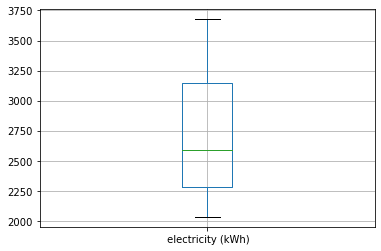

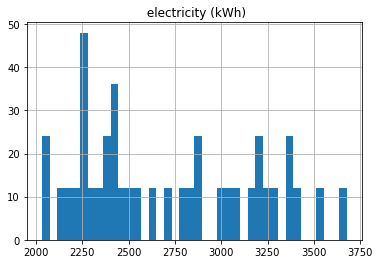

In [279]:
# Univariate Analysis: Boxplot & Histograms for Numerical Variables:
for var in df_col:
    print("Missing values of " + var + ": " + str(df[var].isna().sum()))
    df[[var]].boxplot()
    df[[var]].hist(bins=40)
    plt.show()

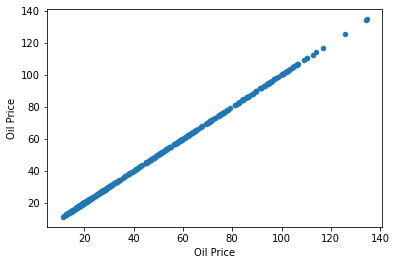

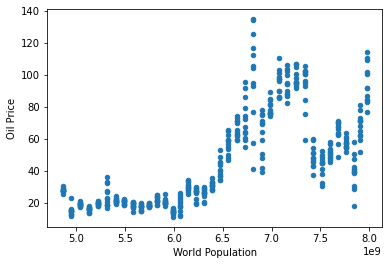

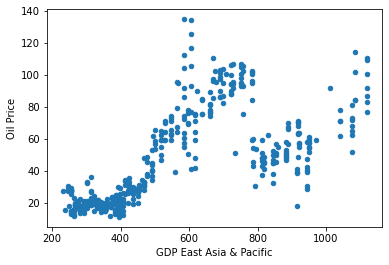

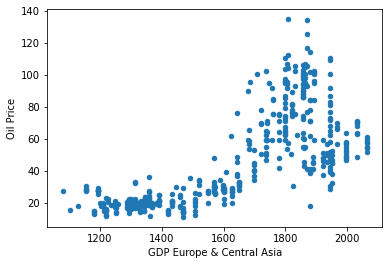

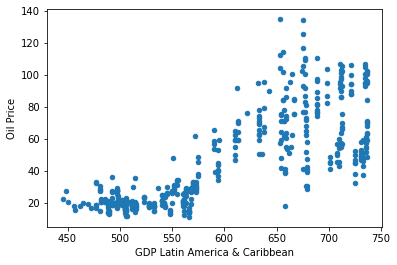

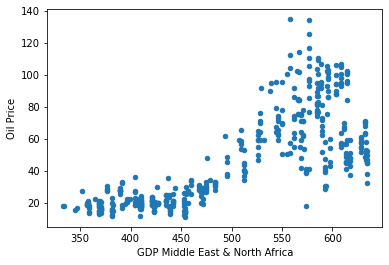

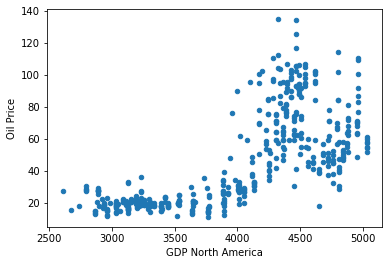

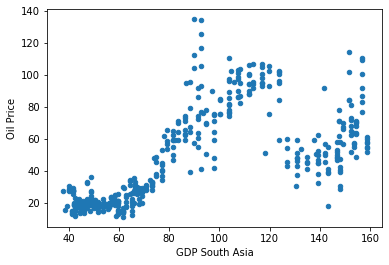

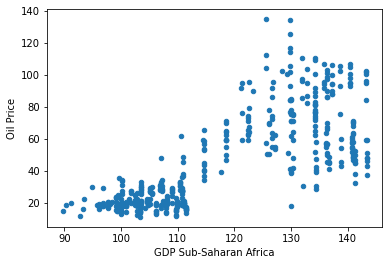

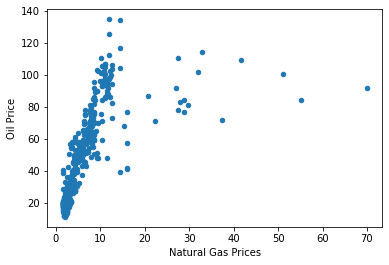

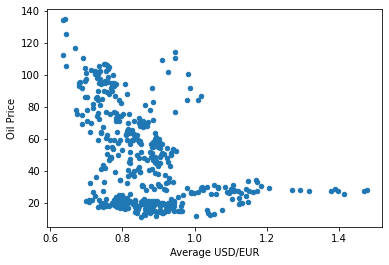

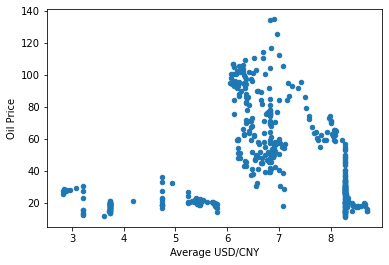

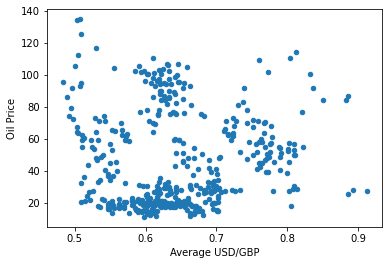

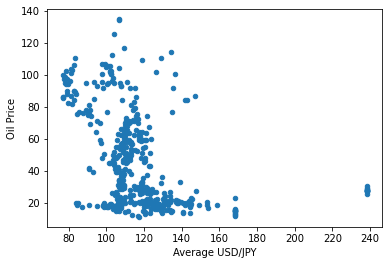

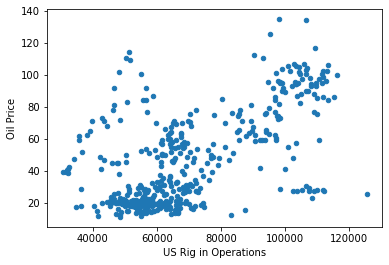

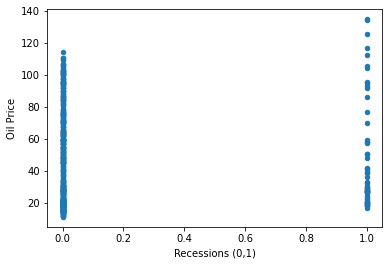

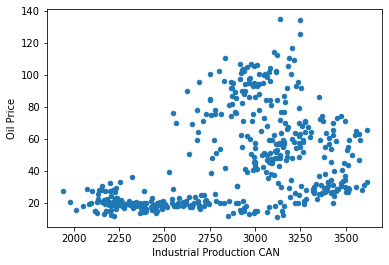

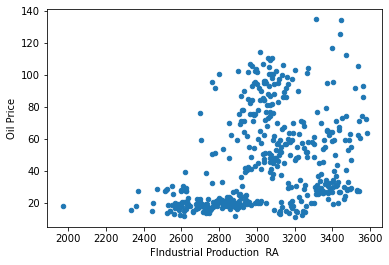

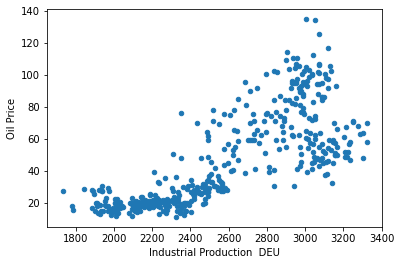

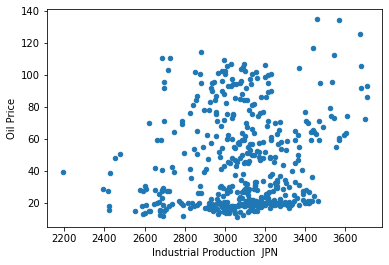

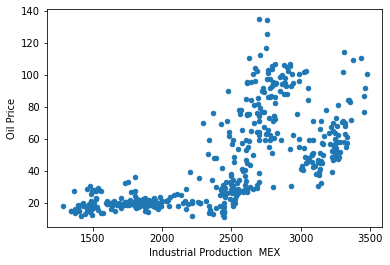

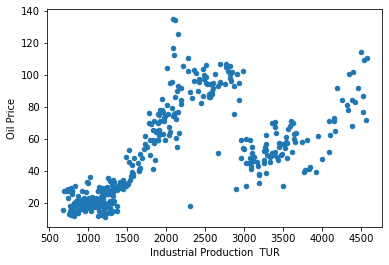

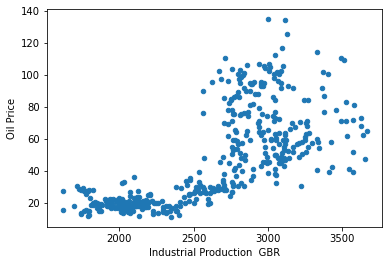

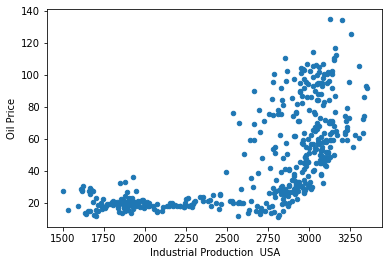

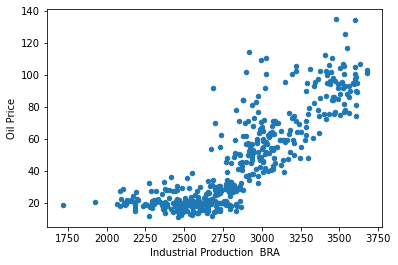

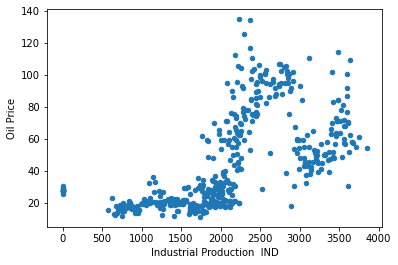

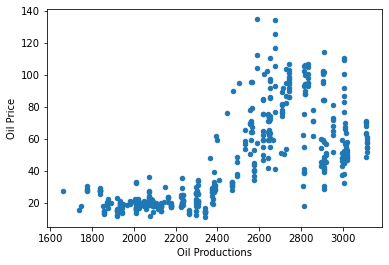

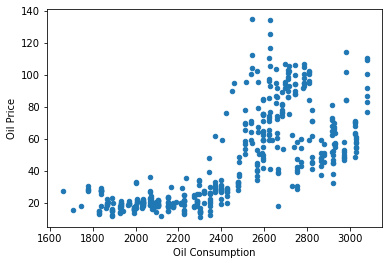

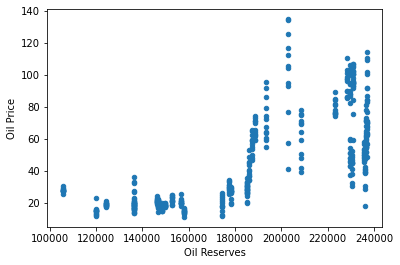

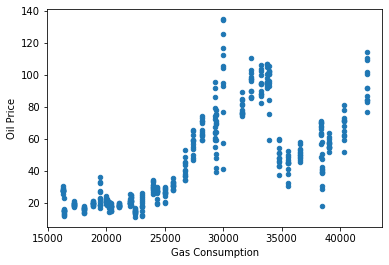

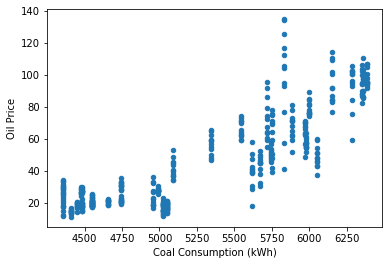

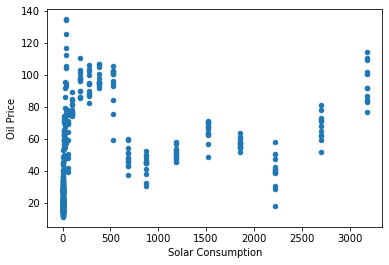

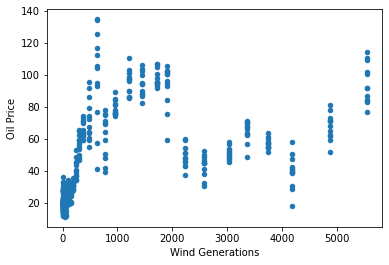

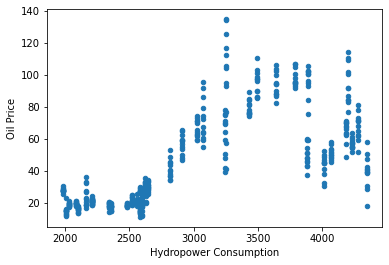

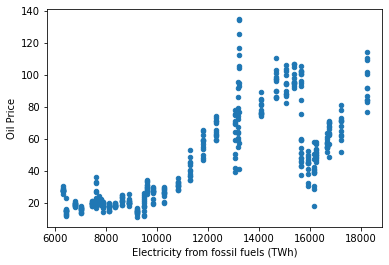

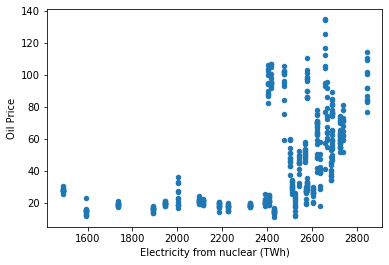

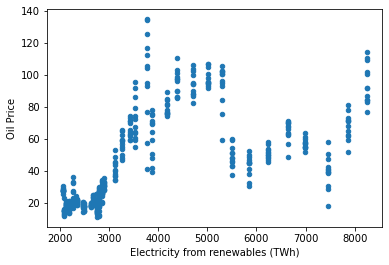

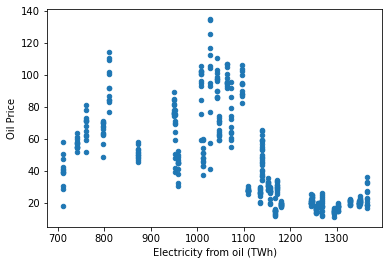

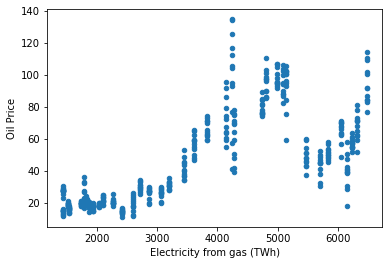

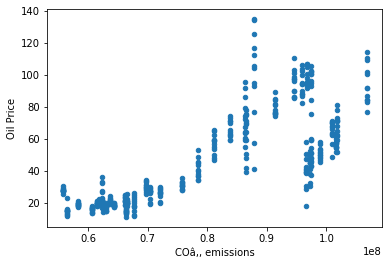

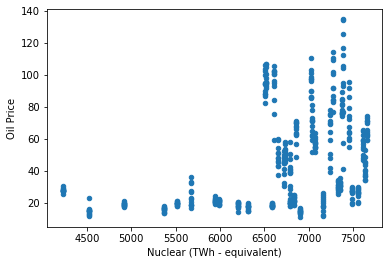

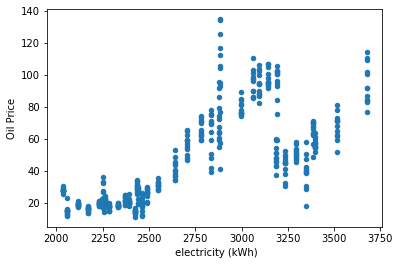

In [280]:
# Bivariate Analysis for Numerical Variables:
for var in df_col:
    df.plot(kind='scatter',
                x=var, 
                y='Oil Price')
    plt.show()

In [281]:
#Check correlation
corrM = df.corr()
corrM

,Oil Price,World Population,GDP East Asia & Pacific,GDP Europe & Central Asia,GDP Latin America & Caribbean,GDP Middle East & North Africa,GDP North America,GDP South Asia,GDP Sub-Saharan Africa,Natural Gas Prices,...,Wind Generations,Hydropower Consumption,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Electricity from oil (TWh),Electricity from gas (TWh),COâ‚‚ emissions,Nuclear (TWh - equivalent),electricity (kWh)
Oil Price,1.000000,0.717370,0.688886,0.751002,0.786608,0.778163,0.712745,0.672365,0.773357,0.657376,...,0.518771,0.705908,0.771855,0.543911,0.605436,-0.609582,0.736554,0.799612,0.410827,0.750088
World Population,0.717370,1.000000,0.966531,0.962526,0.923448,0.952860,0.968887,0.967933,0.833993,0.557244,...,0.842338,0.981788,0.989318,0.817846,0.924085,-0.867514,0.987102,0.980731,0.631696,0.983984
GDP East Asia & Pacific,0.688886,0.966531,1.000000,0.917517,0.892078,0.907842,0.919164,0.991028,0.863215,0.616971,...,0.942239,0.982500,0.975643,0.688994,0.984130,-0.904741,0.982092,0.963897,0.459537,0.988091
GDP Europe & Central Asia,0.751002,0.962526,0.917517,1.000000,0.957570,0.980175,0.990422,0.934262,0.883718,0.506158,...,0.746925,0.934745,0.960420,0.807131,0.845118,-0.833775,0.956466,0.962098,0.645211,0.943398
GDP Latin America & Caribbean,0.786608,0.923448,0.892078,0.957570,1.000000,0.984161,0.935448,0.917659,0.936244,0.483462,...,0.713359,0.929791,0.942845,0.676791,0.818358,-0.799907,0.932395,0.950060,0.496372,0.920801
GDP Middle East & North Africa,0.778163,0.952860,0.907842,0.980175,0.984161,1.000000,0.962978,0.929563,0.910516,0.494707,...,0.726091,0.941840,0.959447,0.750036,0.833007,-0.817808,0.951239,0.964046,0.578369,0.937344
GDP North America,0.712745,0.968887,0.919164,0.990422,0.935448,0.962978,1.000000,0.928557,0.830645,0.518895,...,0.754746,0.930333,0.953606,0.851249,0.850040,-0.825938,0.948687,0.948459,0.698744,0.939667
GDP South Asia,0.672365,0.967933,0.991028,0.934262,0.917659,0.929563,0.928557,1.000000,0.888399,0.546275,...,0.920661,0.989331,0.977392,0.676826,0.972929,-0.912378,0.987221,0.967537,0.448312,0.984277
GDP Sub-Saharan Africa,0.773357,0.833993,0.863215,0.883718,0.936244,0.910516,0.830645,0.888399,1.000000,0.488959,...,0.741232,0.877672,0.889927,0.467334,0.810065,-0.804681,0.890501,0.906184,0.249495,0.877084
Natural Gas Prices,0.657376,0.557244,0.616971,0.506158,0.483462,0.494707,0.518895,0.546275,0.488959,1.000000,...,0.599779,0.539824,0.597790,0.433574,0.590295,-0.495225,0.570337,0.599983,0.297662,0.617151


In [282]:
df.columns

Index(['Oil Price', 'World Population', 'GDP East Asia & Pacific',
       'GDP Europe & Central Asia', 'GDP Latin America & Caribbean',
       'GDP Middle East & North Africa', 'GDP North America', 'GDP South Asia',
       'GDP Sub-Saharan Africa', 'Natural Gas Prices', 'Average USD/EUR',
       'Average USD/CNY', 'Average USD/GBP', 'Average USD/JPY',
       'US Rig in Operations', 'Recessions (0,1)',
       ' Industrial Production CAN', 'FIndustrial Production  RA',
       'Industrial Production  DEU', 'Industrial Production  JPN',
       'Industrial Production  MEX', 'Industrial Production  TUR',
       'Industrial Production  GBR', 'Industrial Production  USA',
       'Industrial Production  BRA', 'Industrial Production  IND',
       'Oil Productions', 'Oil Consumption', 'Oil Reserves', 'Gas Consumption',
       'Coal Consumption (kWh)', 'Solar Consumption', 'Wind Generations',
       'Hydropower Consumption', 'Electricity from fossil fuels (TWh)',
       'Electricity from nuclear (

<Figure size 2400x1200 with 0 Axes>

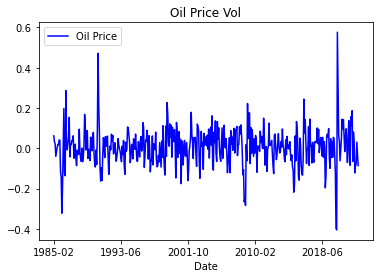

In [283]:
# Graph the volatility
df_vol2 = (df[['Oil Price']] - df[['Oil Price']].shift(1))/df[['Oil Price']].shift(1)
df_vol2 = df_vol2.dropna()
#print(df_vol2)
plt.figure(figsize=(16, 8), dpi=150)

df_vol2.plot(label='Predicted Price', color='blue')

plt.title('Oil Price Vol')

plt.legend()


In [284]:
#Add additional feartures using existing features' rate of change, mean, 
#standard diviation, min, max, 25th and 75th percentile

#df['Oil Price - 1'] = df['Oil Price'].shift(1)

for var in df.columns.drop('Oil Price').drop(['Recessions (0,1)']):
    df[var+'_change rate'] = (df[var]-df[var].shift(1))/df[var].shift(1)
    for i in [3,6,12,24]:
        df[var+'_change rate std_'+str(i)] = df[var+'_change rate'].rolling(window=i).std()
        df[var+'_mean_'+str(i)] = df[var].rolling(window=i).mean()
        df[var+'_std_'+str(i)] = df[var].rolling(window=i).std()        
        df[var+'_min_'+str(i)] = df[var].rolling(window=i).min()
        df[var+'_max_'+str(i)] = df[var].rolling(window=i).max()
        df[var+'_25th%_'+str(i)] = df[var].rolling(window=i).quantile(0.25)
        df[var+'_75th%_'+str(i)] = df[var].rolling(window=i).quantile(0.75)


df_col = df.columns 
df['Time'] = np.arange(len(df.index))
df = df.dropna()



In [285]:
# Scaling all features exept the time and oil price
#scaler = StandardScaler()
scaler = MinMaxScaler()
df_price = df['Oil Price'].values.tolist()
df_time = df['Time'].values.tolist()
df_date = df.index
df = df.drop(['Oil Price', 'Time'], axis = 1)
df = scaler.fit_transform(df)
df = pd.DataFrame(df)
df['Date'] = df_date
df['Oil Price'] = df_price
df['Time'] = df_time
df = df.set_index('Date')

# Adding the current, previuse and next month to each record
df['Month'] = pd.to_numeric(df.index.str[-2:])
df['Month - 1'] = pd.to_numeric(df['Month'].shift(1))
df['Month + 1'] = pd.to_numeric(df['Month'].shift(-1))
df.loc['2022-12','Month + 1'] = 1
df.loc['1988-01','Month - 1'] = 12

df = df.dropna()

df_main = df

In [286]:
# Selecting the date range
#df['Time'] = np.arange(len(df.index))
df.to_csv('DatasetFinalMonthlymore.csv')
dd = df.loc[df.index >= '1987-01']
df = dd
df = dd.loc[dd.index <= '2022-12']
df.shape

(420, 1206)

In [287]:
#col_drop = []
#df_col = df.columns.drop(['Oil Price']).drop(['Time'])
#for col in df_col:
#    corr = df[['Oil Price', col]].corr().iloc[0][col]
#    if abs(corr) < 0.5 or math.isnan(corr):
#        col_drop.append(col)


In [288]:
#df = df.drop(col_drop,axis = 1)
#df.shape

In [289]:
# Check the corrilation
corrM = df.corr()
corrM

,0,1,2,3,4,5,6,7,8,9,...,1196,1197,1198,1199,1200,Oil Price,Time,Month,Month - 1,Month + 1
0,1.000000e+00,0.969743,0.953120,0.919587,0.946295,0.960537,0.973245,0.863437,0.548046,-0.005203,...,0.463217,0.985290,0.985146,0.983918,0.984091,0.704810,0.999501,5.314611e-16,-5.129934e-18,-5.766046e-16
1,9.697427e-01,1.000000,0.908851,0.877485,0.895093,0.913755,0.989838,0.868797,0.603390,-0.004369,...,0.504787,0.982941,0.988581,0.982823,0.986757,0.664592,0.969229,1.639780e-02,2.959306e-02,3.202549e-03
2,9.531195e-01,0.908851,1.000000,0.957481,0.978651,0.988167,0.930751,0.914277,0.488222,-0.054785,...,0.460968,0.931228,0.933581,0.933692,0.935266,0.742524,0.954759,4.441701e-02,8.026749e-02,8.566528e-03
3,9.195868e-01,0.877485,0.957481,1.000000,0.985421,0.934271,0.907099,0.946434,0.459179,-0.147245,...,0.390086,0.916574,0.909977,0.917883,0.914666,0.773897,0.919401,4.722972e-02,8.535870e-02,9.100748e-03
4,9.462950e-01,0.895093,0.978651,0.985421,1.000000,0.959078,0.921507,0.931438,0.471696,-0.143047,...,0.395481,0.934709,0.927289,0.934777,0.931509,0.766574,0.946290,3.977207e-02,7.188666e-02,7.657474e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Oil Price,7.048097e-01,0.664592,0.742524,0.773897,0.766574,0.701265,0.646351,0.765891,0.644309,-0.410223,...,0.611777,0.692097,0.731776,0.705180,0.726650,1.000000,0.708822,1.738146e-02,-1.112387e-02,3.672553e-02
Time,9.995005e-01,0.969229,0.954759,0.919401,0.946290,0.962632,0.971689,0.863614,0.554706,-0.004953,...,0.469707,0.984019,0.984640,0.983715,0.984560,0.708822,1.000000,2.847213e-02,1.533115e-02,1.533115e-02
Month,5.314611e-16,0.016398,0.044417,0.047230,0.039772,0.045450,0.016295,0.050121,0.048328,0.000959,...,-0.028356,0.014183,-0.000203,0.042248,0.044335,0.017381,0.028472,1.000000e+00,5.384615e-01,5.384615e-01
Month - 1,-5.129934e-18,0.029593,0.080267,0.085359,0.071887,0.082126,0.029413,0.090599,0.036407,-0.019873,...,-0.082683,0.011604,-0.000166,0.025985,0.028856,-0.011124,0.015331,5.384615e-01,1.000000e+00,1.608392e-01


In [290]:
# Setting the text on the Y-axis
#plt.ylabel("Oil Prices")

# Setting the size of our graph
#plt.plot(df[['Date']],df[['Oil Price']])
#df_price = pd.DataFrame()
#df_price = df[['Date','Oil Price']]
#df_price.set_index('Date')

#plt.plot(df_price.set_index('Date'))
#plt.gcf().autofmt_xdate()
#plt.show()

In [291]:
# Enter the number of prediction using 1, 6 or 12 months prediction
val = int(input("Enter your value: "))

Enter your value: 12


In [292]:
# Prepare the prediction dataframe to be used for future prediction
if val == 1:
    
    df_predict = df_main[-1:].drop(['Oil Price'], axis = 1)
    df_predict['DateF'] = ['2023-01']
    df_predict['Time'] = [456]
    df_predict = df_predict.set_index('DateF')
    df_predict.rename(index={'DateF': 'Date'}, inplace=True)
    df_predict['Month'] = [1]
    df_predict['Month - 1'] = [12]
    df_predict['Month + 1'] = [2]
    #df_predict = df_predict.drop(col_drop,axis = 1)
    #df_main = df_main.drop(col_drop,axis = 1)
    
elif val == 6:
    df_predict = df_main[-6:].drop(['Oil Price'], axis = 1)
    df_predict['DateF'] = ['2023-01','2023-02','2023-03','2023-04','2023-05','2023-06']
    df_predict['Time'] = [456, 457, 458, 459, 460, 461]
    df_predict = df_predict.set_index('DateF')
    df_predict.rename(index={'DateF': 'Date'}, inplace=True)
    df_predict['Month'] = [1,2,3,4,5,6]
    df_predict['Month - 1'] = [12,1,2,3,4,5]
    df_predict['Month + 1'] = [2,3,4,5,6,7]

    #df_predict = df_predict.drop(col_drop,axis = 1)
    #df_main = df_main.drop(col_drop,axis = 1)

elif val == 12:
    df_predict = df_main[-12:].drop(['Oil Price'], axis = 1)
    df_predict['DateF'] = ['2023-01','2023-02','2023-03','2023-04','2023-05','2023-06', '2023-07',
                           '2023-08','2023-09','2023-10','2023-11','2023-12']
    df_predict['Time'] = [456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467]
    df_predict = df_predict.set_index('DateF')
    df_predict.rename(index={'DateF': 'Date'}, inplace=True)
    df_predict['Month'] = [1,2,3,4,5,6,7,8,9,10,11,12]
    df_predict['Month - 1'] = [12,1,2,3,4,5,6,7,8,9,10,11]
    df_predict['Month + 1'] = [2,3,4,5,6,7,8,9,10,11,12,1]
    #df_predict = df_predict.drop(col_drop,axis = 1)
    #df_main = df_main.drop(col_drop,axis = 1)

#####################################################


In [293]:
# Perform shift based on the entered value
for var in df.columns.drop('Oil Price'):
    df[var] = df[var].shift(val)
df = df.dropna()
for var in df_main.columns.drop('Oil Price'):
    df_main[var] = df_main[var].shift(val)
df_main = df_main.dropna()
print(df.shape)
print(df_main.shape)

(408, 1206)
(408, 1206)


In [294]:
df_predict

,0,1,2,3,4,5,6,7,8,9,...,1195,1196,1197,1198,1199,1200,Time,Month,Month - 1,Month + 1
DateF,,,,,,,,,,,,,,,,,,,,,
2023-01,1.0,1.000000,0.860711,0.798114,0.839829,0.967383,0.982632,0.828527,0.385727,0.463680,...,0.899941,0.804664,0.887302,1.0,0.887302,0.894816,456,1,12,2
2023-02,1.0,0.871968,0.642559,0.572965,0.650714,0.744003,0.851729,0.586749,0.372446,0.460226,...,0.909037,0.879899,0.887302,1.0,0.887302,0.894816,457,2,1,3
2023-03,1.0,1.000000,0.860711,0.798114,0.839829,0.967383,0.982632,0.828527,0.587712,0.511156,...,0.918134,0.934311,0.887302,1.0,0.887302,0.894816,458,3,2,4
2023-04,1.0,0.957323,0.787993,0.723064,0.776790,0.892923,0.938997,0.747934,0.445563,0.540831,...,0.927230,0.971344,0.887302,1.0,0.887302,0.894816,459,4,3,5
2023-05,1.0,1.000000,0.860711,0.798114,0.839829,0.967383,0.982632,0.828527,0.379451,0.579445,...,0.936326,0.992912,0.887302,1.0,0.887302,0.894816,460,5,4,6
2023-06,1.0,0.957323,0.787993,0.723064,0.776790,0.892923,0.938997,0.747934,0.458990,0.581140,...,0.945422,1.000000,0.887302,1.0,0.971825,0.921112,461,6,5,7
2023-07,1.0,1.000000,0.860711,0.798114,0.839829,0.967383,0.982632,0.828527,0.725190,0.644842,...,0.954519,0.992912,0.887302,1.0,1.000000,1.000000,462,7,6,8
2023-08,1.0,1.000000,0.860711,0.798114,0.839829,0.967383,0.982632,0.828527,1.000000,0.658807,...,0.963615,0.971344,0.887302,1.0,1.000000,1.000000,463,8,7,9
2023-09,1.0,0.957323,0.787993,0.723064,0.776790,0.892923,0.938997,0.747934,0.784005,0.698606,...,0.972711,0.934311,0.887302,1.0,1.000000,1.000000,464,9,8,10


In [295]:
#Y_train, X_train = df_train[['Oil Price']], df_train.drop(['Oil Price', 'Time'], axis = 1)
#Y_test, X_test = df_test[['Oil Price']], df_test.drop(['Oil Price','Time'], axis = 1)


In [296]:
df_predict.columns

Index([          0,           1,           2,           3,           4,
                 5,           6,           7,           8,           9,
       ...
              1195,        1196,        1197,        1198,        1199,
              1200,      'Time',     'Month', 'Month - 1', 'Month + 1'],
      dtype='object', length=1205)

In [297]:
df_Y, df_X = df[['Oil Price']], df.drop(['Oil Price'], axis = 1)


In [298]:
i = list(range(20,0,-1))
i

[20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [299]:
#Train and test the model in a step by step way. starting with alll data except the last 20 record and then predict
#the next value, store it, add the actual record and retrain until training all dataframe 

# Select a linear model
results = []
Y_test_g = df[-20:][['Oil Price']]
for i in list(range(20,0,-1)):
    
    df_train, df_test = df[:-1*i], df[-1*i:]
    df_train
    Y_train, X_train = df_train[['Oil Price']], df_train.drop(['Oil Price'], axis = 1)
    Y_test, X_test = df_test[['Oil Price']], df_test.drop(['Oil Price'], axis = 1)

    model1 = sklearn.ensemble.RandomForestRegressor()
    model2 = sklearn.ensemble.RandomForestRegressor()

    #model1 = sklearn.neighbors.KNeighborsRegressor()
    #model2 = sklearn.neighbors.KNeighborsRegressor()

    #model1 = sklearn.linear_model.LinearRegression()
    #model2 = sklearn.linear_model.LinearRegression()

    # Train the model
    model1.fit(X_train, Y_train)

    # Predict training set

    train_predicted = model1.predict(X_train)

    # Update training set with predectid values
    X_train = pd.DataFrame(X_train)
    X_train['Price Predicted'] = train_predicted

    # Train the 2nd model
    model2.fit(X_train, Y_train)

    # Predict the 2nd training set
    train_predicted2 = model2.predict(X_train)

    # Predict Test set


    test_predicted = model1.predict(X_test)


    # Update test set with predectid values
    X_test = pd.DataFrame(X_test)
    X_test['Price Predicted'] = test_predicted

    # Predict the 2nd test set
    test_predicted2 = model2.predict(X_test)
    results.append(test_predicted2[0])
    print (str(i))

20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1


In [300]:
# Get the results
(mean_squared_error(Y_train, train_predicted2, squared = False),
 mean_squared_error(Y_test, test_predicted2, squared = False))

(0.8891376607325677, 9.128318053100017)

In [301]:
# Check the RMSE
if val == 1:
    df_graph_2 = Y_test_g
    df_graph_2['1'] = results
    print(mean_squared_error(df_graph_2['Oil Price'], df_graph_2['1'], squared = False))
elif val == 6:
    df_graph_2['6'] = results
    print(mean_squared_error(df_graph_2['Oil Price'], df_graph_2['6'], squared = False))
else:
    df_graph_2['12'] = results
    print(mean_squared_error(df_graph_2['Oil Price'], df_graph_2['12'], squared = False))


10.041593344156167


In [302]:
print(mean_squared_error(df_graph_2['Oil Price'], df_graph_2['1'], squared = False))
print(mean_squared_error(df_graph_2['Oil Price'], df_graph_2['6'], squared = False))
print(mean_squared_error(df_graph_2['Oil Price'], df_graph_2['12'], squared = False))


13.70631061558091
9.230731170831207
10.041593344156167


In [303]:
df_graph_2

,Oil Price,1,6,12
Date,,,,
2021-05,65.092581,54.310734,58.755009,69.617209
2021-06,71.406667,61.833560,63.933032,64.496771
2021-07,72.852258,64.713635,69.325294,71.447042
2021-08,67.714839,64.808305,71.273798,71.913683
2021-09,71.354000,62.850195,69.544902,69.728738
2021-10,81.140645,62.444525,70.070977,70.043191
2021-11,78.058667,67.392926,76.403913,76.918223
2021-12,71.488065,70.128654,71.075367,76.630585
2022-01,82.679355,62.437113,71.923629,75.730021


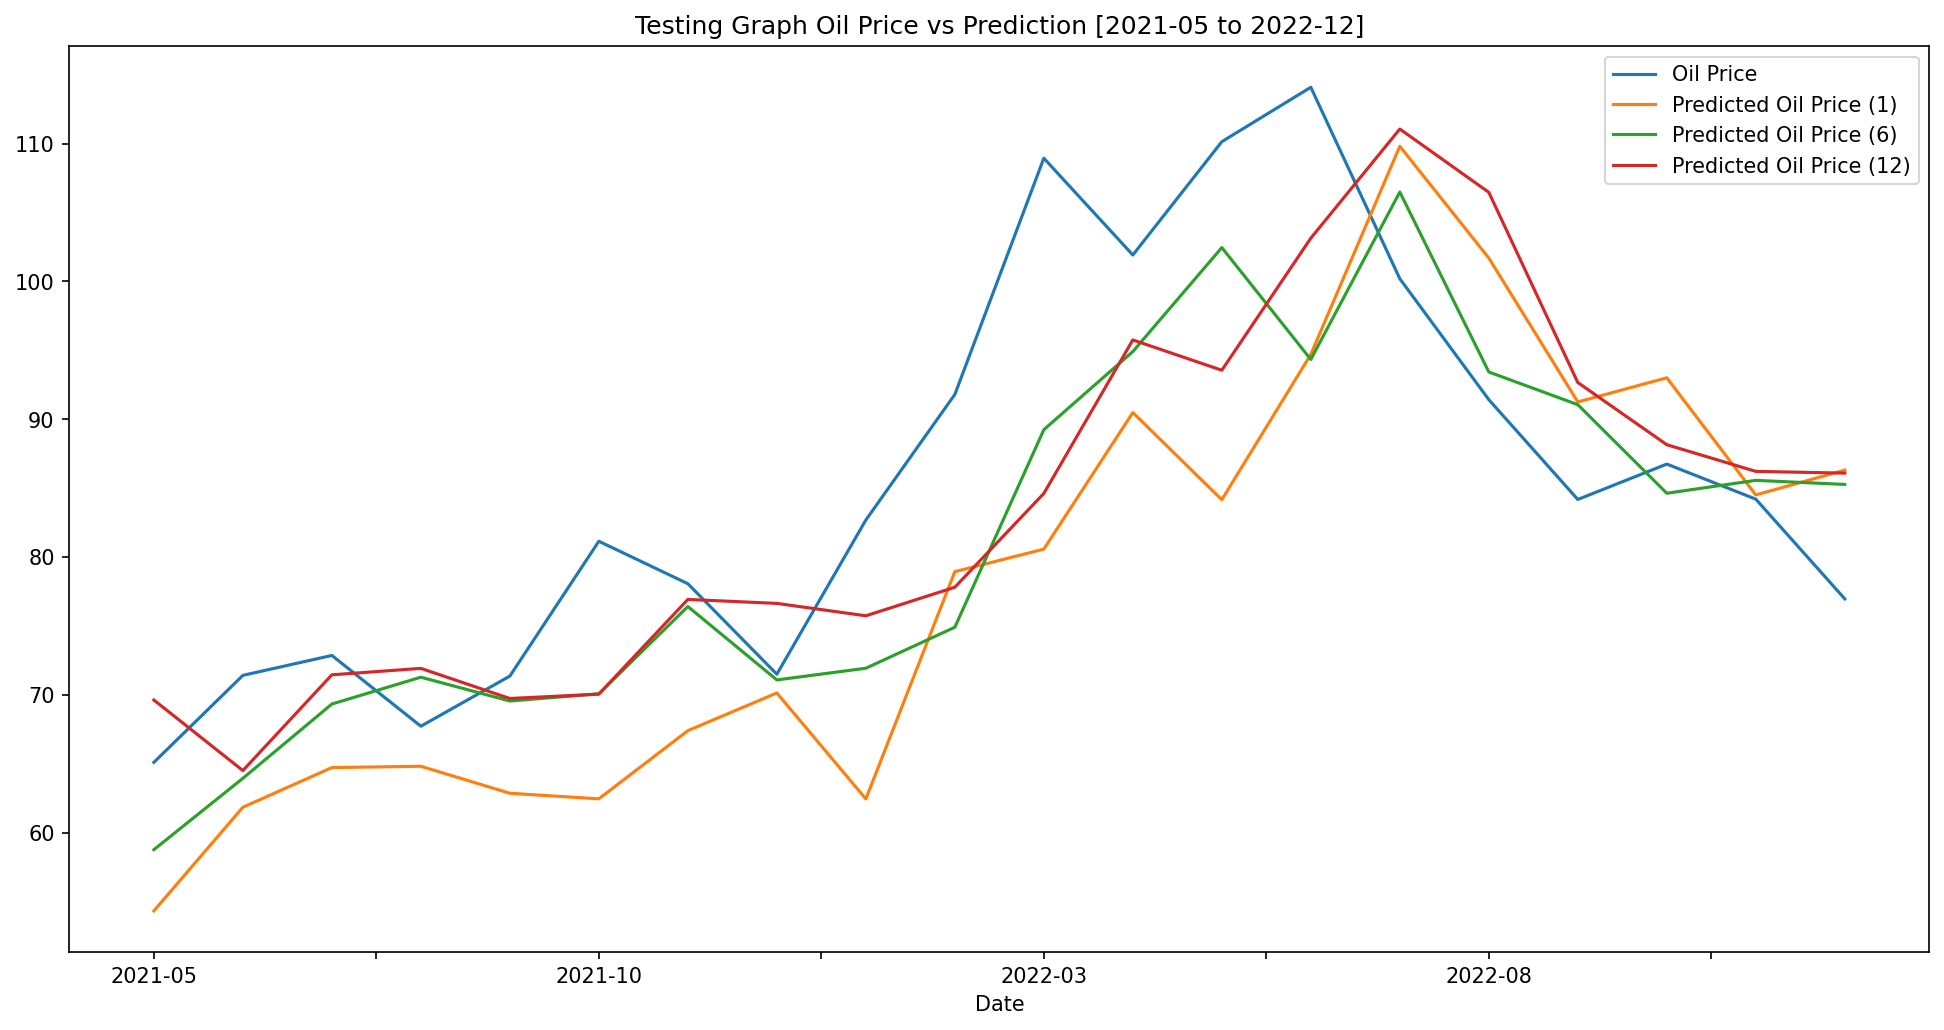

In [304]:
# Plot the testing results vs the actual price
plt.figure(figsize=(16, 8), dpi=150)

df_graph_2['Oil Price'].plot(label='Oil Price')

for var in df_graph_2.columns.drop('Oil Price'):
    df_graph_2[var].plot(label='Predicted Oil Price (' + var + ')')
    
plt.title('Testing Graph Oil Price vs Prediction [2021-05 to 2022-12]')

plt.legend()

RMSE =  0.9964230916253421


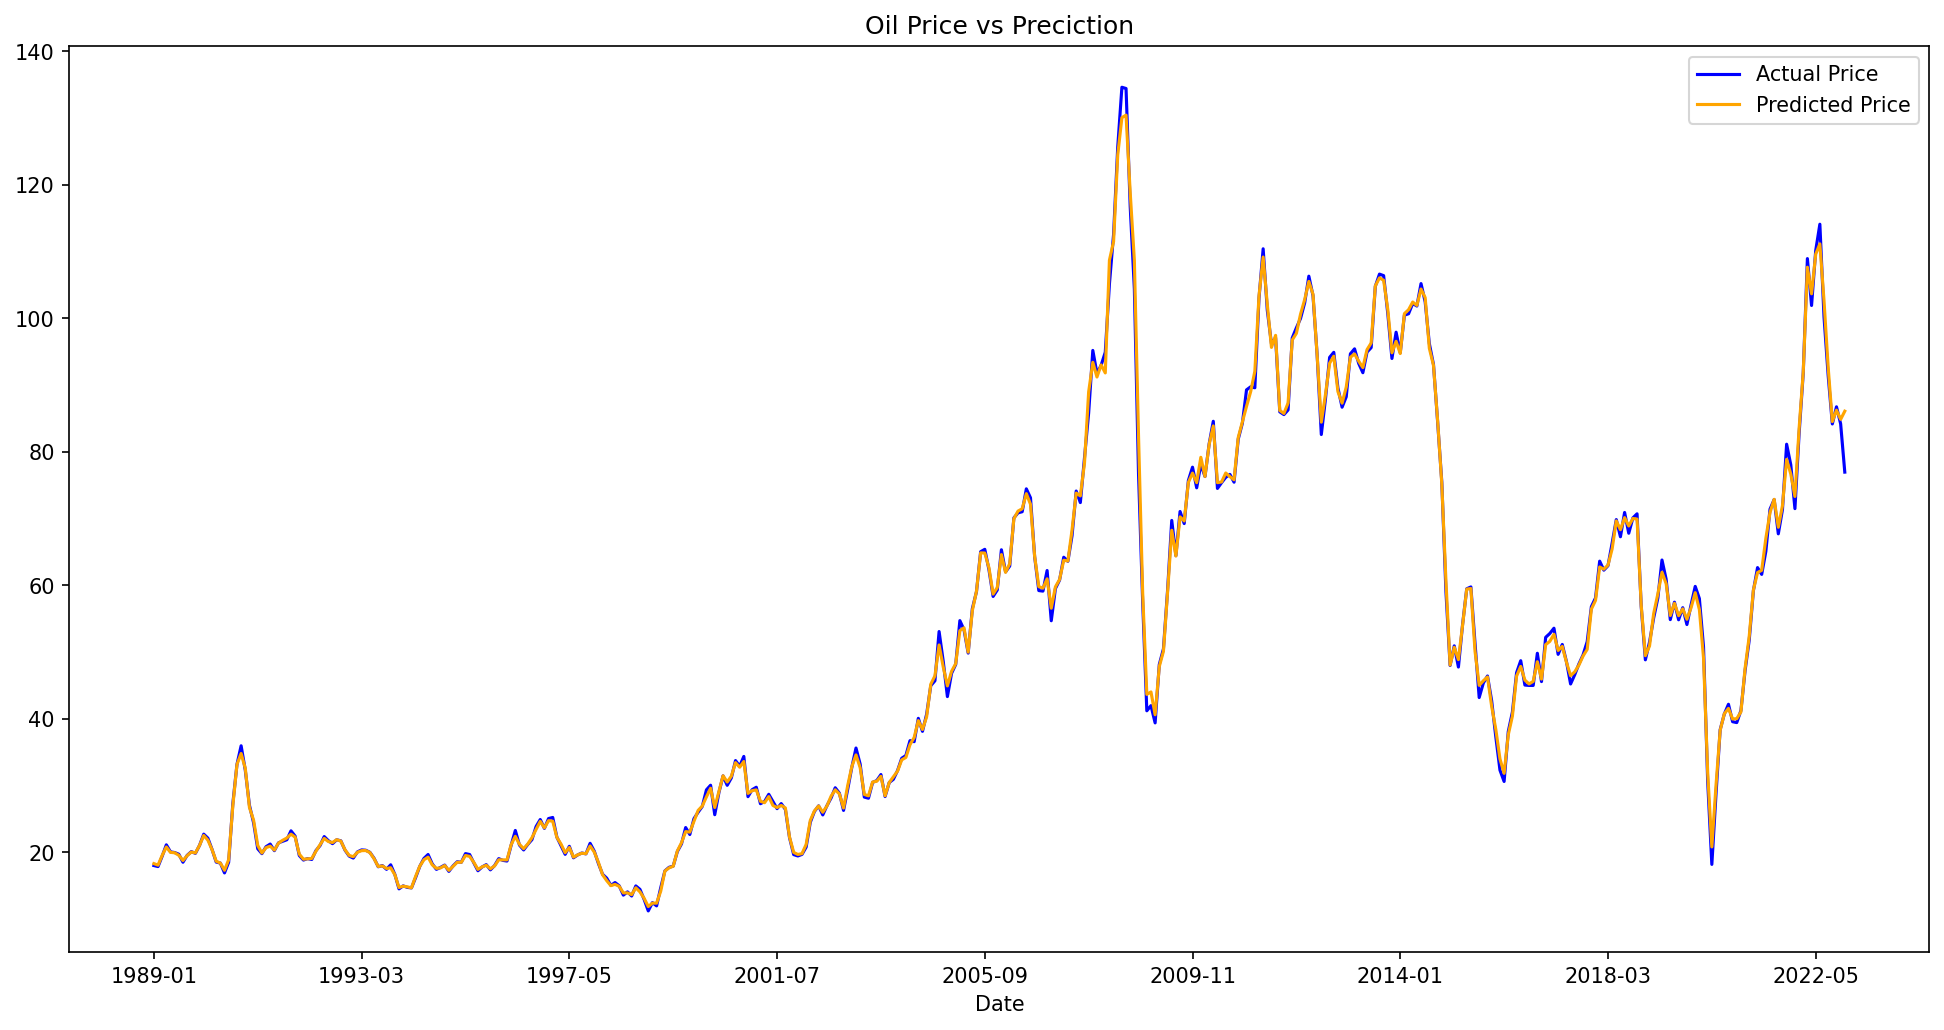

In [305]:
# Predict the whole dataframe
predicted_price1 = model1.predict(df_X)

# Update test set with predectid values

lat_y_pred = [0]
lat_result = []
i = 0


test_predicted = model1.predict(df_X)



df_X = pd.DataFrame(df_X)
df_X['Price Predicted'] = test_predicted



# Predict the 2nd test set
predicted_price = model2.predict(df_X)

df_pr = df
df_pr['Predicted Oil Price'] = predicted_price

print('RMSE = ', mean_squared_error(df_Y, predicted_price, squared = False))

plt.figure(figsize=(16, 8), dpi=150)

df_pr['Oil Price'].plot(label='Actual Price', color='blue')
df_pr['Predicted Oil Price'].plot(label='Predicted Price', color='orange')

plt.title('Oil Price vs Preciction')

plt.legend()

In [306]:
df_X.columns

Index([                0,                 1,                 2,
                       3,                 4,                 5,
                       6,                 7,                 8,
                       9,
       ...
                    1196,              1197,              1198,
                    1199,              1200,            'Time',
                 'Month',       'Month - 1',       'Month + 1',
       'Price Predicted'],
      dtype='object', length=1206)

In [307]:
df_X['Price Predicted']

Date
1989-01    19.182597
1989-02    18.746203
1989-03    19.822574
1989-04    20.476282
1989-05    20.034603
             ...    
2022-08    93.287173
2022-09    86.280385
2022-10    87.217032
2022-11    86.371340
2022-12    86.823729
Name: Price Predicted, Length: 408, dtype: float64

In [308]:
df_X.shape

(408, 1206)

In [309]:
# Building a prediction dataframe
#df_predict = pd.read_csv ('PredictionDataMonthly.csv', index_col='Date')
#df_predict = df_predict.dropna()

In [310]:
#df_predict.isna().sum().sort_values(ascending=False)

In [311]:
#df_predict

In [312]:
##from statsmodels.tsa.ar_model import AutoReg
#for var in df_col.drop('Oil Price'):
#    model3 = sklearn.linear_model.LinearRegression()
#    model4 = sklearn.linear_model.LinearRegression()
#    df_var = pd.DataFrame()
#    df_var['Time'] = df['Time']
#    df_var[var] = df[var]
#    df_var[var+'_mean_2'] = df[var].rolling(window=2).mean()
#    df_var = df_var.dropna()
#    df_var_x, df_var_y = df_var[['Time', var+'_mean_2']], df_var[var]
#    model3.fit(df_var_x,df_var_y)
#    last_values = [df[var].to_numpy()[len(df[var].to_numpy())-1], df[var].to_numpy()[len(df[var].to_numpy())-2]]
#    
#    lat_y_pred = [0]
#    lat_result = []
#    i = 0
#    for test_sample in df_predict[['Time']].to_numpy():       
#        if i == 0:
#            test_sample = np.append(test_sample, (last_values[0]+last_values[1])/2)
#        elif i == 1:
#            test_sample = np.append(test_sample, ((last_values[0]+lat_result[len(lat_result)-1])/2))
#        else:
#            test_sample = np.append(test_sample, ((lat_result[len(lat_result)-2]+lat_result[len(lat_result)-1])/2))        
#        
#        lat_y_pred = model3.predict(test_sample.reshape(1,-1))
#
#        lat_result.append(lat_y_pred[0])
#        i = i + 1
       
    
#    df_predict[var] = lat_result
    
    

In [313]:
df_predict

,0,1,2,3,4,5,6,7,8,9,...,1195,1196,1197,1198,1199,1200,Time,Month,Month - 1,Month + 1
DateF,,,,,,,,,,,,,,,,,,,,,
2023-01,1.0,1.000000,0.860711,0.798114,0.839829,0.967383,0.982632,0.828527,0.385727,0.463680,...,0.899941,0.804664,0.887302,1.0,0.887302,0.894816,456,1,12,2
2023-02,1.0,0.871968,0.642559,0.572965,0.650714,0.744003,0.851729,0.586749,0.372446,0.460226,...,0.909037,0.879899,0.887302,1.0,0.887302,0.894816,457,2,1,3
2023-03,1.0,1.000000,0.860711,0.798114,0.839829,0.967383,0.982632,0.828527,0.587712,0.511156,...,0.918134,0.934311,0.887302,1.0,0.887302,0.894816,458,3,2,4
2023-04,1.0,0.957323,0.787993,0.723064,0.776790,0.892923,0.938997,0.747934,0.445563,0.540831,...,0.927230,0.971344,0.887302,1.0,0.887302,0.894816,459,4,3,5
2023-05,1.0,1.000000,0.860711,0.798114,0.839829,0.967383,0.982632,0.828527,0.379451,0.579445,...,0.936326,0.992912,0.887302,1.0,0.887302,0.894816,460,5,4,6
2023-06,1.0,0.957323,0.787993,0.723064,0.776790,0.892923,0.938997,0.747934,0.458990,0.581140,...,0.945422,1.000000,0.887302,1.0,0.971825,0.921112,461,6,5,7
2023-07,1.0,1.000000,0.860711,0.798114,0.839829,0.967383,0.982632,0.828527,0.725190,0.644842,...,0.954519,0.992912,0.887302,1.0,1.000000,1.000000,462,7,6,8
2023-08,1.0,1.000000,0.860711,0.798114,0.839829,0.967383,0.982632,0.828527,1.000000,0.658807,...,0.963615,0.971344,0.887302,1.0,1.000000,1.000000,463,8,7,9
2023-09,1.0,0.957323,0.787993,0.723064,0.776790,0.892923,0.938997,0.747934,0.784005,0.698606,...,0.972711,0.934311,0.887302,1.0,1.000000,1.000000,464,9,8,10


In [314]:
df_main

,0,1,2,3,4,5,6,7,8,9,...,1196,1197,1198,1199,1200,Oil Price,Time,Month,Month - 1,Month + 1
Date,,,,,,,,,,,,,,,,,,,,,
1989-01,0.00000,0.022585,0.108934,0.205850,0.122370,0.116600,0.027451,0.405264,0.007297,0.294431,...,0.278308,0.000000,0.000000,0.000000,0.000000,18.028387,36.0,1.0,12.0,2.0
1989-02,0.00000,0.000290,0.012001,0.093961,0.042582,0.022569,0.001807,0.271386,0.005546,0.335120,...,0.301873,0.000000,0.000000,0.000000,0.000000,17.873571,37.0,2.0,1.0,3.0
1989-03,0.00000,0.022585,0.108934,0.205850,0.122370,0.116600,0.027451,0.405264,0.003503,0.319252,...,0.318690,0.000000,0.000000,0.000000,0.000000,19.433226,38.0,3.0,2.0,4.0
1989-04,0.00000,0.011437,0.060467,0.149906,0.082476,0.069584,0.014629,0.338325,0.001897,0.311263,...,0.329742,0.000000,0.000000,0.000000,0.000000,21.138333,39.0,4.0,3.0,5.0
1989-05,0.00000,0.022585,0.108934,0.205850,0.122370,0.116600,0.027451,0.405264,0.000876,0.331285,...,0.335572,0.000000,0.000000,0.000000,0.000000,20.081290,40.0,5.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08,0.97685,0.949116,0.860711,0.801398,0.851464,0.931140,0.944886,0.830542,0.201693,0.401080,...,0.628943,0.887302,0.891051,0.887302,0.894816,91.418065,439.0,8.0,7.0,9.0
2022-09,0.97685,0.908080,0.787993,0.726242,0.788050,0.857849,0.902469,0.749885,0.303123,0.400947,...,0.652076,0.887302,0.891051,0.887302,0.894816,84.173333,440.0,9.0,8.0,10.0
2022-10,0.97685,0.949116,0.860711,0.801398,0.851464,0.931140,0.944886,0.830542,0.413748,0.424365,...,0.671800,0.887302,0.891051,0.887302,0.894816,86.742903,441.0,10.0,9.0,11.0


In [315]:
df_predict.shape

(12, 1205)

In [316]:
df_predict

,0,1,2,3,4,5,6,7,8,9,...,1195,1196,1197,1198,1199,1200,Time,Month,Month - 1,Month + 1
DateF,,,,,,,,,,,,,,,,,,,,,
2023-01,1.0,1.000000,0.860711,0.798114,0.839829,0.967383,0.982632,0.828527,0.385727,0.463680,...,0.899941,0.804664,0.887302,1.0,0.887302,0.894816,456,1,12,2
2023-02,1.0,0.871968,0.642559,0.572965,0.650714,0.744003,0.851729,0.586749,0.372446,0.460226,...,0.909037,0.879899,0.887302,1.0,0.887302,0.894816,457,2,1,3
2023-03,1.0,1.000000,0.860711,0.798114,0.839829,0.967383,0.982632,0.828527,0.587712,0.511156,...,0.918134,0.934311,0.887302,1.0,0.887302,0.894816,458,3,2,4
2023-04,1.0,0.957323,0.787993,0.723064,0.776790,0.892923,0.938997,0.747934,0.445563,0.540831,...,0.927230,0.971344,0.887302,1.0,0.887302,0.894816,459,4,3,5
2023-05,1.0,1.000000,0.860711,0.798114,0.839829,0.967383,0.982632,0.828527,0.379451,0.579445,...,0.936326,0.992912,0.887302,1.0,0.887302,0.894816,460,5,4,6
2023-06,1.0,0.957323,0.787993,0.723064,0.776790,0.892923,0.938997,0.747934,0.458990,0.581140,...,0.945422,1.000000,0.887302,1.0,0.971825,0.921112,461,6,5,7
2023-07,1.0,1.000000,0.860711,0.798114,0.839829,0.967383,0.982632,0.828527,0.725190,0.644842,...,0.954519,0.992912,0.887302,1.0,1.000000,1.000000,462,7,6,8
2023-08,1.0,1.000000,0.860711,0.798114,0.839829,0.967383,0.982632,0.828527,1.000000,0.658807,...,0.963615,0.971344,0.887302,1.0,1.000000,1.000000,463,8,7,9
2023-09,1.0,0.957323,0.787993,0.723064,0.776790,0.892923,0.938997,0.747934,0.784005,0.698606,...,0.972711,0.934311,0.887302,1.0,1.000000,1.000000,464,9,8,10


In [317]:
# Predict the future 1, 6 or 12 months prediction
#df_predict_ss = scaler.fit_transform(df_predict.drop(['Time'], axis = 1))


#predicted_price1 = model1.predict(df_predict)

lat_y_pred = [0]
lat_result = []
i = 0
for test_sample in df_predict.to_numpy():       

    lat_y_pred = model1.predict(test_sample.reshape(1,-1))
#    if lat_y_pred[0] < 50:
#        lat_y_pred[0] = (df_main['Oil Price'].to_numpy()[len(df_main) - 1] + df_main['Oil Price'].to_numpy()[len(df_main) - 2])/2

    lat_result.append(lat_y_pred[0])
    i = i + 1

predicted_price1 = lat_result


# Update test set with predectid values
df_predict = pd.DataFrame(df_predict)

df_predict['Price Predicted'] = predicted_price1

# Predict the 2nd test set
predicted_price = model2.predict(df_predict)


df_predict['Predicted Oil Price'] = predicted_price


In [318]:
df_predict['Predicted Oil Price']

DateF
2023-01     85.539583
2023-02     92.207243
2023-03    105.064087
2023-04    106.630325
2023-05    107.389798
2023-06     79.228807
2023-07     79.395467
2023-08     80.826962
2023-09     76.404833
2023-10     78.924200
2023-11     76.426982
2023-12     75.352059
Name: Predicted Oil Price, dtype: float64

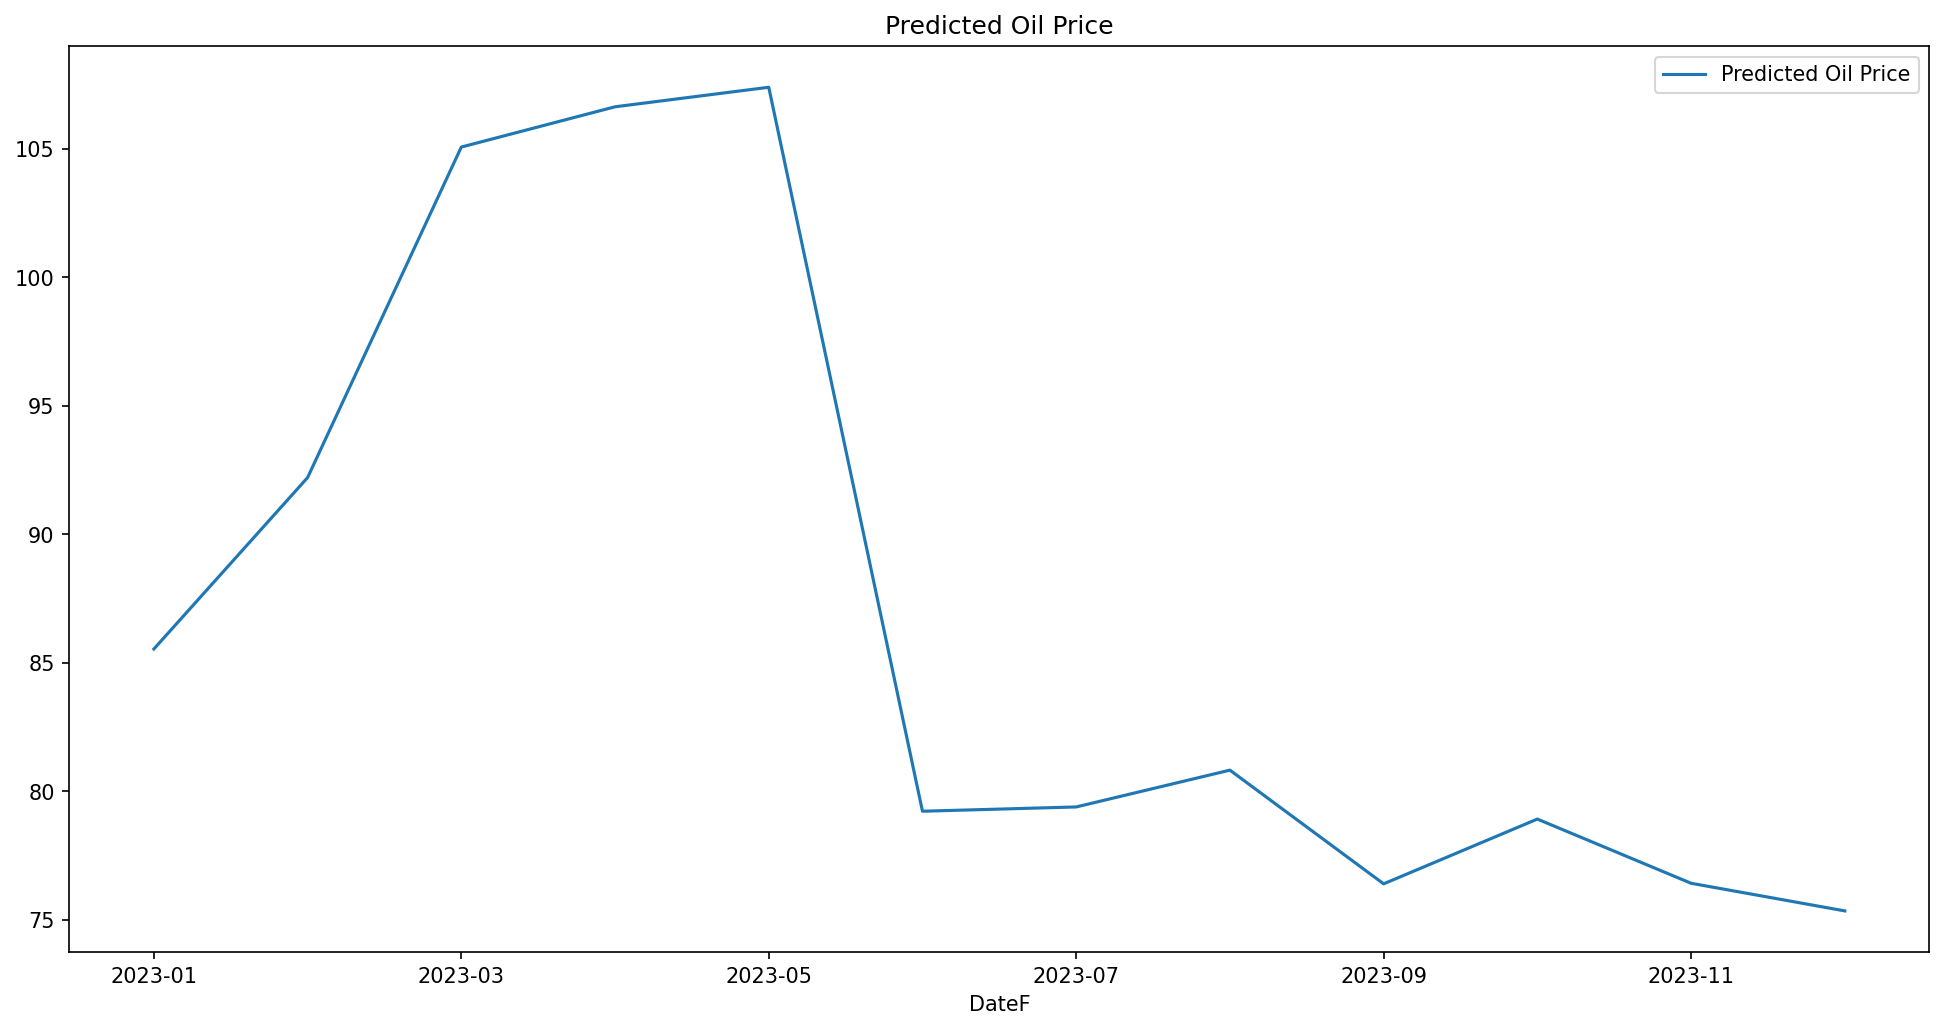

In [319]:
plt.figure(figsize=(16, 8), dpi=150)

df_predict['Predicted Oil Price'].plot(label='Predicted Oil Price')

plt.title('Predicted Oil Price')

plt.legend()

In [320]:
df_predict

,0,1,2,3,4,5,6,7,8,9,...,1197,1198,1199,1200,Time,Month,Month - 1,Month + 1,Price Predicted,Predicted Oil Price
DateF,,,,,,,,,,,,,,,,,,,,,
2023-01,1.0,1.000000,0.860711,0.798114,0.839829,0.967383,0.982632,0.828527,0.385727,0.463680,...,0.887302,1.0,0.887302,0.894816,456,1,12,2,86.436824,85.539583
2023-02,1.0,0.871968,0.642559,0.572965,0.650714,0.744003,0.851729,0.586749,0.372446,0.460226,...,0.887302,1.0,0.887302,0.894816,457,2,1,3,93.418408,92.207243
2023-03,1.0,1.000000,0.860711,0.798114,0.839829,0.967383,0.982632,0.828527,0.587712,0.511156,...,0.887302,1.0,0.887302,0.894816,458,3,2,4,99.763553,105.064087
2023-04,1.0,0.957323,0.787993,0.723064,0.776790,0.892923,0.938997,0.747934,0.445563,0.540831,...,0.887302,1.0,0.887302,0.894816,459,4,3,5,99.457806,106.630325
2023-05,1.0,1.000000,0.860711,0.798114,0.839829,0.967383,0.982632,0.828527,0.379451,0.579445,...,0.887302,1.0,0.887302,0.894816,460,5,4,6,99.281229,107.389798
2023-06,1.0,0.957323,0.787993,0.723064,0.776790,0.892923,0.938997,0.747934,0.458990,0.581140,...,0.887302,1.0,0.971825,0.921112,461,6,5,7,79.662059,79.228807
2023-07,1.0,1.000000,0.860711,0.798114,0.839829,0.967383,0.982632,0.828527,0.725190,0.644842,...,0.887302,1.0,1.000000,1.000000,462,7,6,8,79.922120,79.395467
2023-08,1.0,1.000000,0.860711,0.798114,0.839829,0.967383,0.982632,0.828527,1.000000,0.658807,...,0.887302,1.0,1.000000,1.000000,463,8,7,9,81.071110,80.826962
2023-09,1.0,0.957323,0.787993,0.723064,0.776790,0.892923,0.938997,0.747934,0.784005,0.698606,...,0.887302,1.0,1.000000,1.000000,464,9,8,10,77.514412,76.404833


In [321]:
df_main[-1:]

,0,1,2,3,4,5,6,7,8,9,...,1196,1197,1198,1199,1200,Oil Price,Time,Month,Month - 1,Month + 1
Date,,,,,,,,,,,,,,,,,,,,,
2022-12,0.97685,0.949116,0.860711,0.801398,0.851464,0.93114,0.944886,0.830542,0.523935,0.466063,...,0.702101,0.887302,0.891051,0.887302,0.894816,76.958387,443.0,12.0,11.0,1.0


In [322]:
# Predict the main data
df_predict_main = df_main.drop(['Oil Price'], axis = 1)

#predicted_price1 = model1.predict(df_predict)

lat_y_pred = [0]
lat_result = []
i = 0
for test_sample in df_predict_main.to_numpy():       

    lat_y_pred = model1.predict(test_sample.reshape(1,-1))
#    if i != 0 and i != 1:
        
#        if lat_y_pred[0] < 5:
#            lat_y_pred[0] = (lat_result[len(lat_result) - 1] + lat_result[len(lat_result) - 2])/2
        
    lat_result.append(lat_y_pred[0])
    i = i + 1

predicted_price1 = lat_result

# Update test set with predectid values
df_predict_main['Price Predicted'] = predicted_price1

# Predict the 2nd test set
predicted_price = model2.predict(df_predict_main)


df_main['Predicted Oil Price'] = predicted_price


In [323]:
df_main = df_main.append(df_predict)
df_main

,0,1,2,3,4,5,6,7,8,9,...,1198,1199,1200,Oil Price,Time,Month,Month - 1,Month + 1,Predicted Oil Price,Price Predicted
1989-01,0.0,0.022585,0.108934,0.205850,0.122370,0.116600,0.027451,0.405264,0.007297,0.294431,...,0.0,0.0,0.0,18.028387,36.0,1.0,12.0,2.0,18.322122,NaN
1989-02,0.0,0.000290,0.012001,0.093961,0.042582,0.022569,0.001807,0.271386,0.005546,0.335120,...,0.0,0.0,0.0,17.873571,37.0,2.0,1.0,3.0,18.087257,NaN
1989-03,0.0,0.022585,0.108934,0.205850,0.122370,0.116600,0.027451,0.405264,0.003503,0.319252,...,0.0,0.0,0.0,19.433226,38.0,3.0,2.0,4.0,19.556060,NaN
1989-04,0.0,0.011437,0.060467,0.149906,0.082476,0.069584,0.014629,0.338325,0.001897,0.311263,...,0.0,0.0,0.0,21.138333,39.0,4.0,3.0,5.0,20.809012,NaN
1989-05,0.0,0.022585,0.108934,0.205850,0.122370,0.116600,0.027451,0.405264,0.000876,0.331285,...,0.0,0.0,0.0,20.081290,40.0,5.0,4.0,6.0,20.004497,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,1.0,1.000000,0.860711,0.798114,0.839829,0.967383,0.982632,0.828527,1.000000,0.658807,...,1.0,1.0,1.0,NaN,463.0,8.0,7.0,9.0,80.826962,81.071110
2023-09,1.0,0.957323,0.787993,0.723064,0.776790,0.892923,0.938997,0.747934,0.784005,0.698606,...,1.0,1.0,1.0,NaN,464.0,9.0,8.0,10.0,76.404833,77.514412
2023-10,1.0,1.000000,0.860711,0.798114,0.839829,0.967383,0.982632,0.828527,0.282399,0.712111,...,1.0,1.0,1.0,NaN,465.0,10.0,9.0,11.0,78.924200,78.772755
2023-11,1.0,0.957323,0.787993,0.723064,0.776790,0.892923,0.938997,0.747934,0.398862,0.640494,...,1.0,1.0,1.0,NaN,466.0,11.0,10.0,12.0,76.426982,77.672859


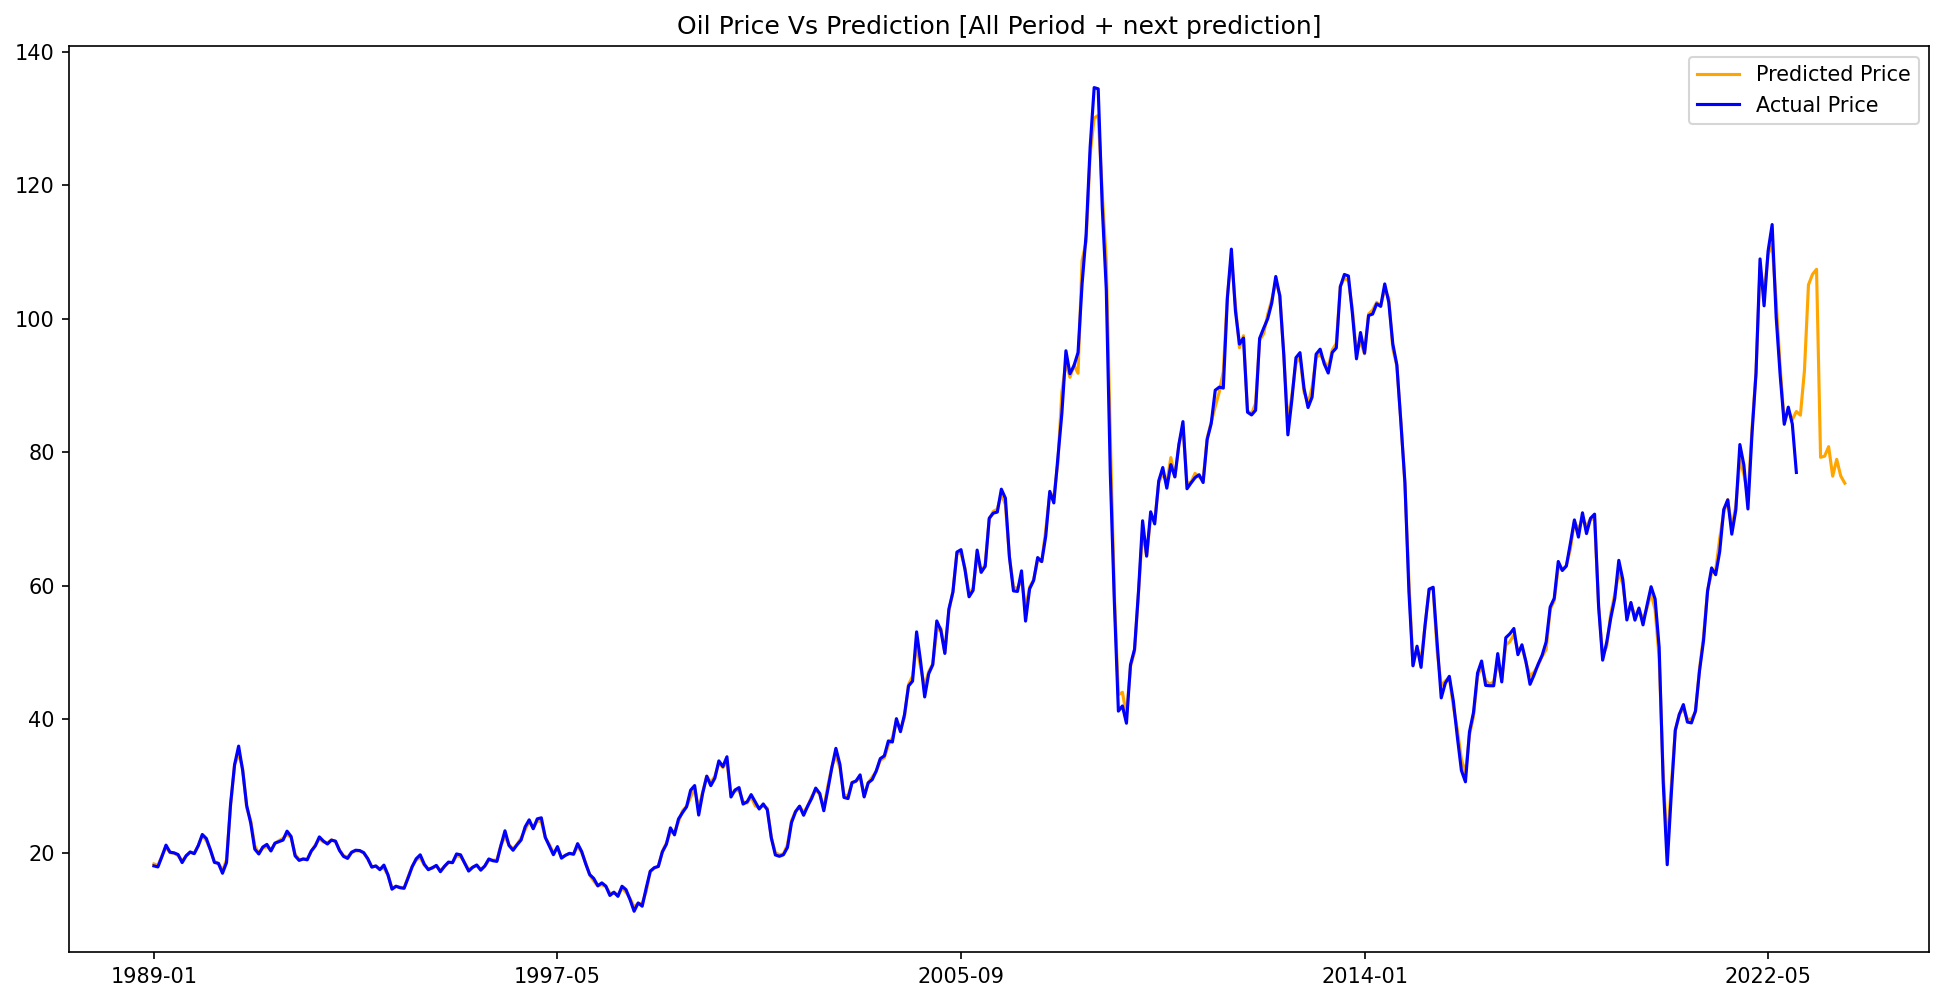

In [324]:
# Plot actual price vs prediction for the whole data set plus the prediction for the future
plt.figure(figsize=(16, 8), dpi=150)
df_main.append(df_predict)

df_main['Predicted Oil Price'].plot(label='Predicted Price', color='orange')

df_main['Oil Price'].plot(label='Actual Price', color='blue')

plt.title('Oil Price Vs Prediction [All Period + next prediction]')

plt.legend()